In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('../taxi dataset/data.csv')

In [3]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
data.dropna(inplace=True)

In [5]:
def radians_to_degrees(radians):
    return radians * (180 / np.pi)

data['pickup_longitude_degrees'] = data['pickup_longitude'].apply(radians_to_degrees)
data['pickup_latitude_degrees'] = data['pickup_latitude'].apply(radians_to_degrees)
data['dropoff_longitude_degrees'] = data['dropoff_longitude'].apply(radians_to_degrees)
data['dropoff_latitude_degrees'] = data['dropoff_latitude'].apply(radians_to_degrees)

data.drop(columns=[ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],inplace=True)

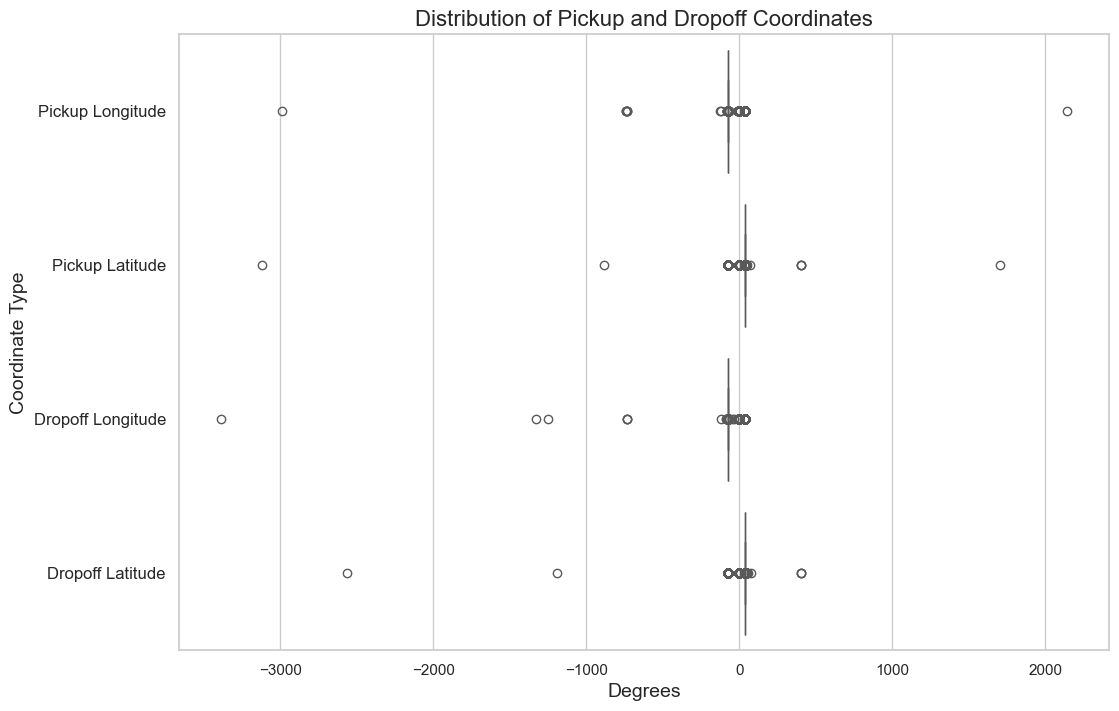

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=data[['pickup_longitude_degrees', 'pickup_latitude_degrees',
                          'dropoff_longitude_degrees', 'dropoff_latitude_degrees']],
                 orient='h', palette='Set2')

ax.set_title('Distribution of Pickup and Dropoff Coordinates', fontsize=16)
ax.set_xlabel('Degrees', fontsize=14)
ax.set_ylabel('Coordinate Type', fontsize=14)
ax.set_yticklabels(['Pickup Longitude', 'Pickup Latitude', 'Dropoff Longitude', 'Dropoff Latitude'],
                   fontsize=12)

plt.show()

In [7]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns = ['pickup_longitude_degrees', 'pickup_latitude_degrees',
           'dropoff_longitude_degrees', 'dropoff_latitude_degrees']

data = remove_outliers(data, columns)

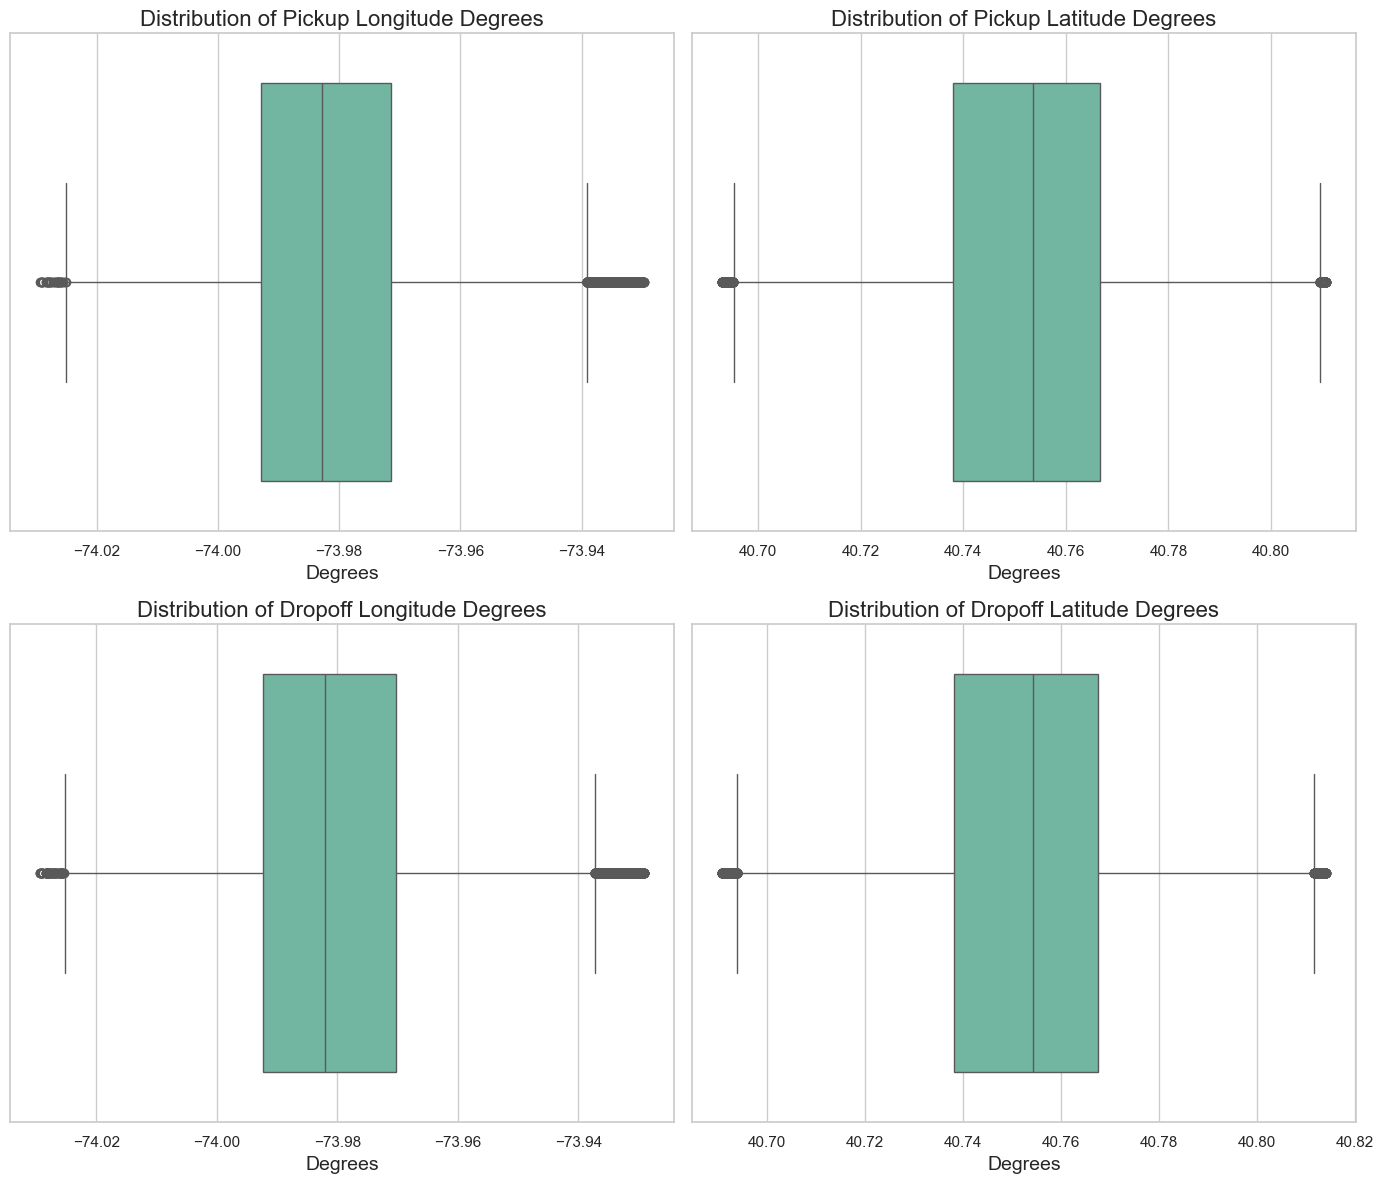

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    sns.boxplot(x=data[col], ax=ax, palette='Set2')
    
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=16)
    ax.set_xlabel('Degrees', fontsize=14)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [9]:
((data['dropoff_latitude_degrees'] == data['pickup_latitude_degrees'])& (data['dropoff_longitude_degrees'] == data['pickup_longitude_degrees'])).sum()

3989

In [10]:
data = data[((data['dropoff_latitude_degrees'] != data['pickup_latitude_degrees'])&
 (data['dropoff_longitude_degrees'] != data['pickup_longitude_degrees']))]

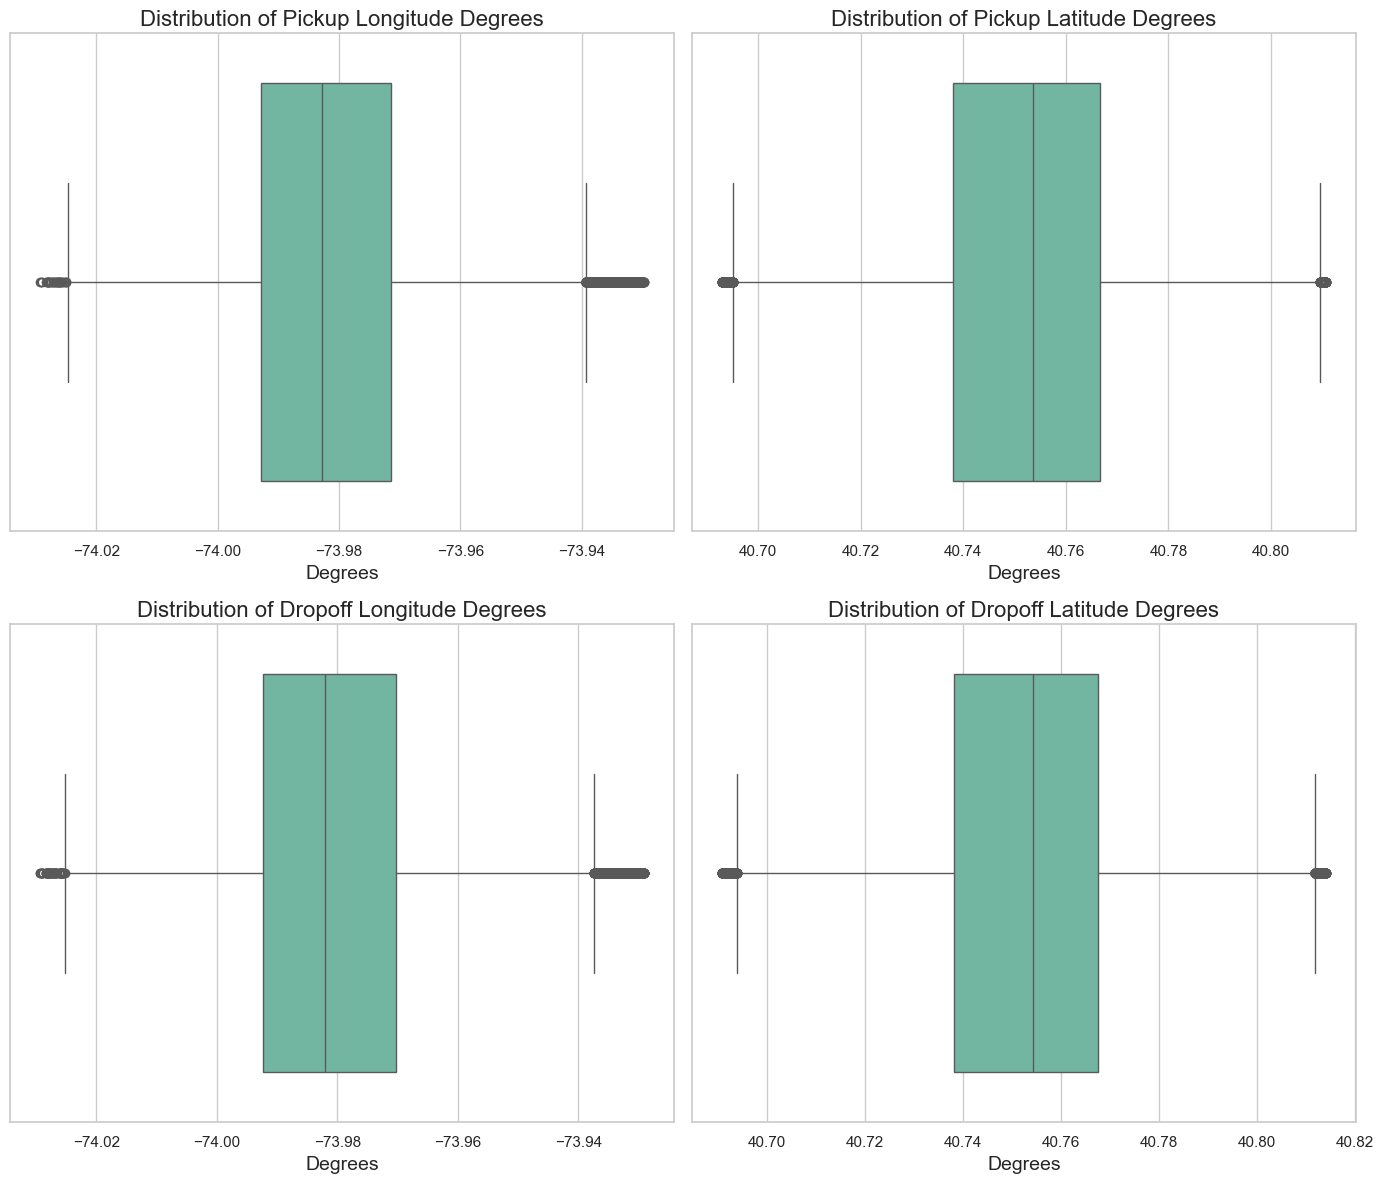

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    sns.boxplot(x=data[col], ax=ax, palette='Set2')
    
    # Add titles and labels
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=16)
    ax.set_xlabel('Degrees', fontsize=14)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [12]:
data['bearing'] = data['bearing'].apply(radians_to_degrees)

In [13]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_longitude_degrees,pickup_latitude_degrees,dropoff_longitude_degrees,dropoff_latitude_degrees
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-21.498366,-74.016048,40.711303,-73.979268,40.782004
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,148.966789,-73.982738,40.761270,-73.991242,40.750562
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,7.672164,-73.987130,40.733143,-73.991567,40.758092
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-28.802783,-73.968095,40.768008,-73.956655,40.783762
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,1,9,6,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-38.631713,-74.000964,40.731630,-73.972892,40.758233


#### Car Condition Encoding

In [14]:
data['Car Condition'].unique()

array(['Excellent', 'Bad', 'Very Good', 'Good'], dtype=object)

> Mapping Car Condition to values from 1 to 4 based on how good the car is.

In [15]:
car_condition_map = {'Excellent':4,'Very Good':3,'Good':2,'Bad':1}

data['Car Condition'] = data['Car Condition'].replace(car_condition_map)

In [16]:
data.duplicated().sum()

0

In [17]:
data.drop(columns=['User ID','User Name','Driver Name','key','pickup_datetime']).duplicated().sum()

0

#### Fare Amount (Target) Transformations

In [18]:
from scipy.stats import skew

Interpreting Skewness

Symmetrical Distribution: Skewness close to 0 (between -0.5 and 0.5).

Moderate Skewness: Skewness between -1 and -0.5 or between 0.5 and 1.

High Skewness: Skewness less than -1 or greater than 1.

In [19]:
num_features = data.select_dtypes(include=np.number).columns
skewness = data[num_features].apply(lambda x: skew(x.dropna()))
print(skewness)

Car Condition                0.000246
fare_amount                  5.690078
passenger_count              1.978887
hour                        -0.456624
day                          0.023749
month                        0.112730
weekday                     -0.034795
year                         0.073475
jfk_dist                    -0.452581
ewr_dist                     0.254470
lga_dist                     0.080281
sol_dist                     0.123019
nyc_dist                     0.229490
distance                     1.442783
bearing                     -0.062166
pickup_longitude_degrees     0.266748
pickup_latitude_degrees     -0.050186
dropoff_longitude_degrees    0.274944
dropoff_latitude_degrees    -0.072539
dtype: float64


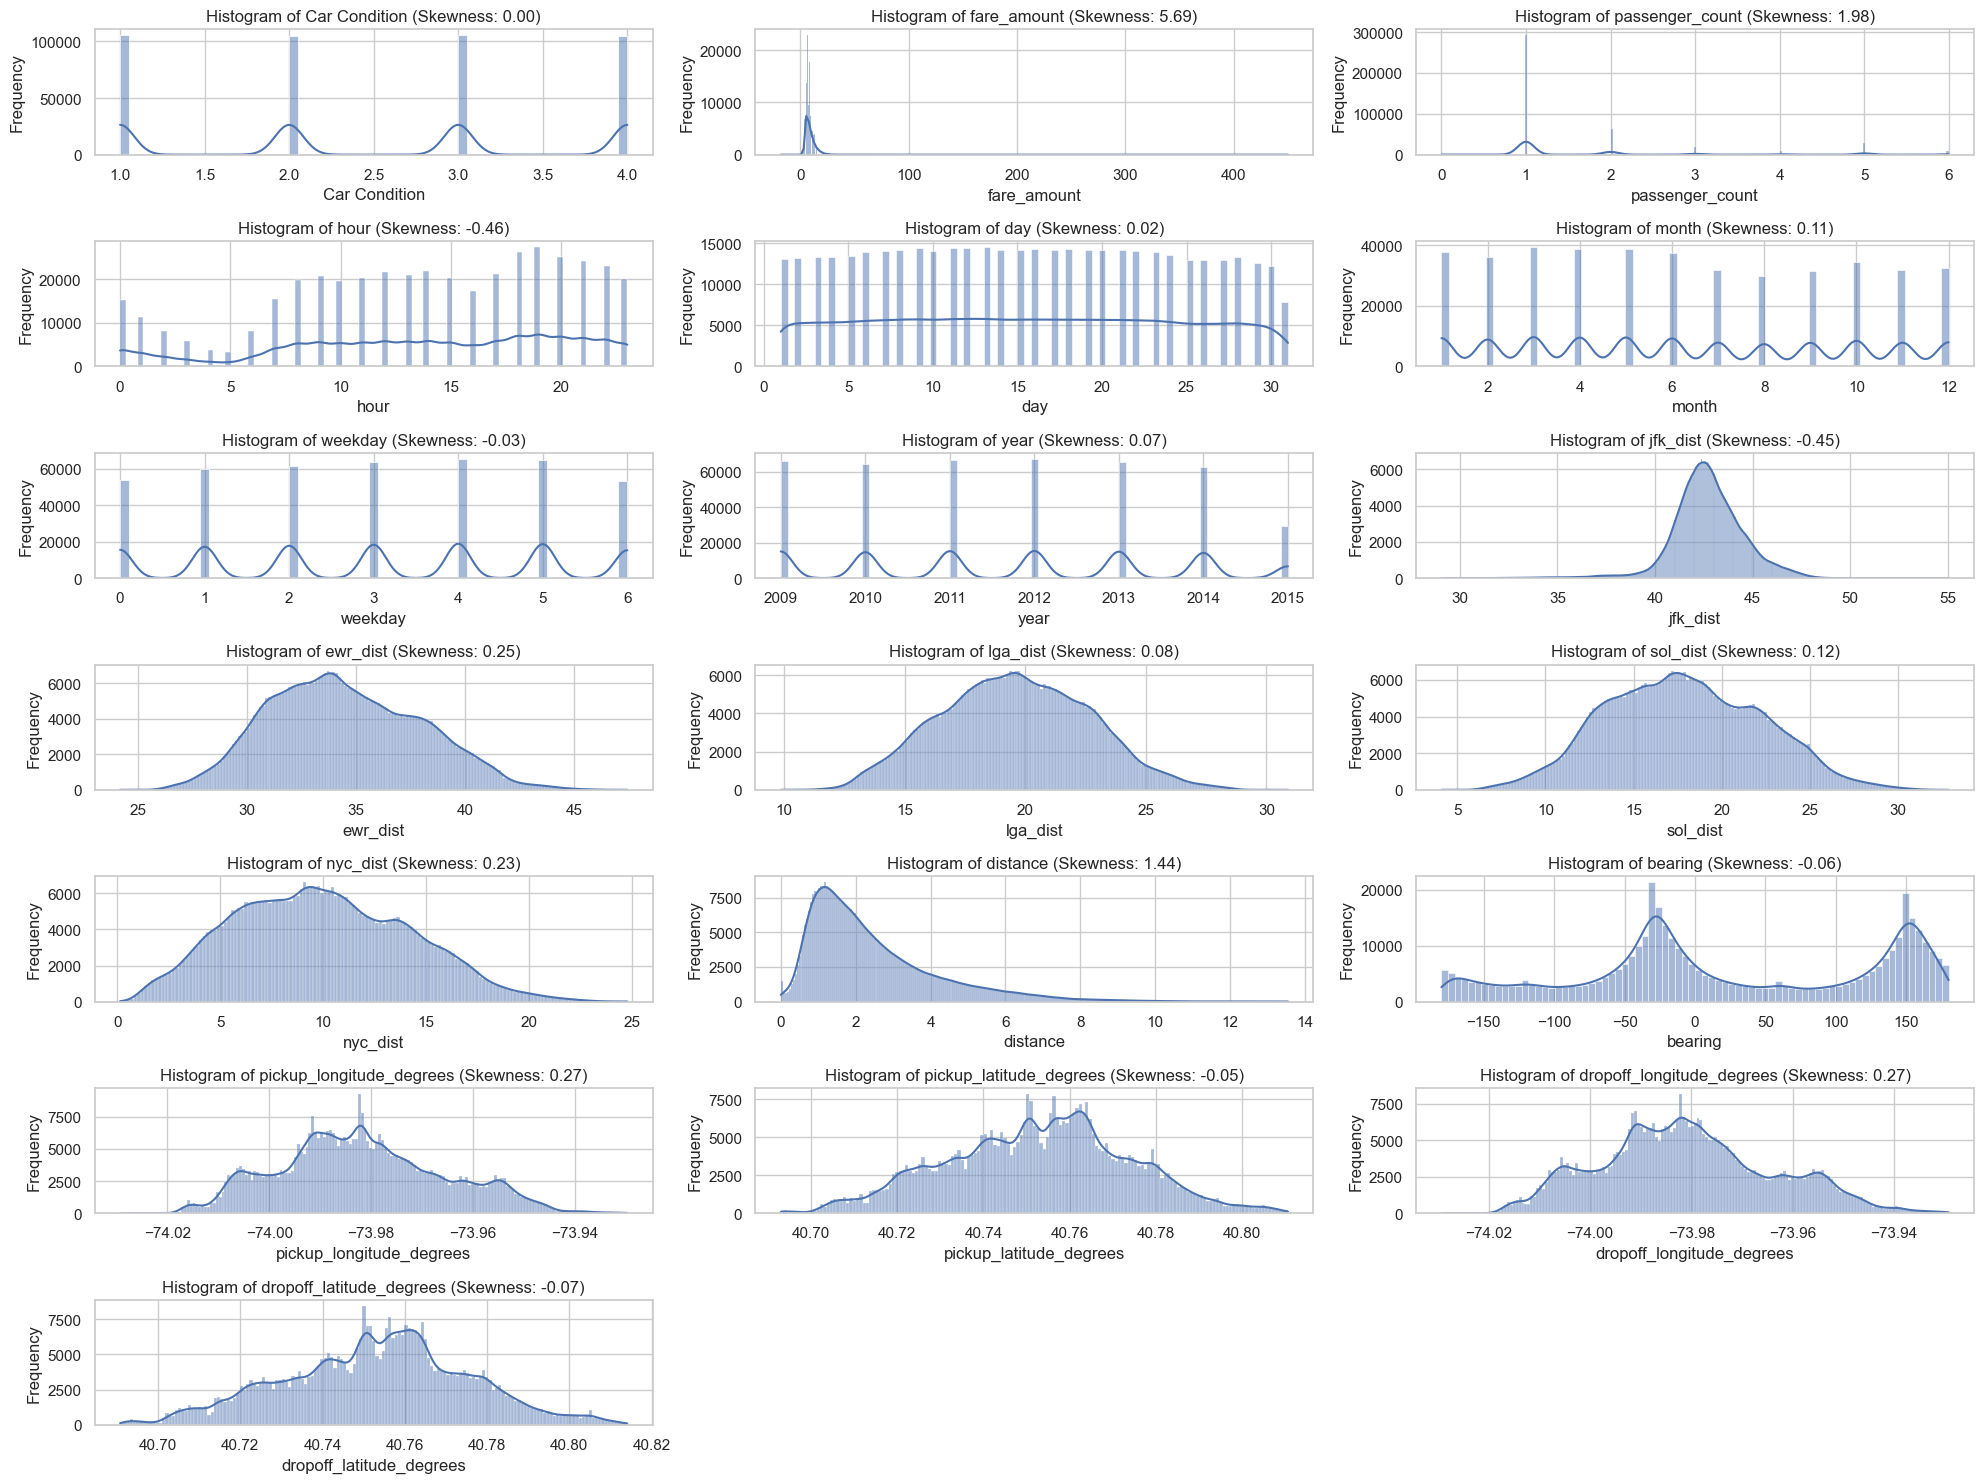

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with skewness
for i, feature in enumerate(num_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature} (Skewness: {skewness[feature]:.2f})')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

i see the `fare amount` and `distance` will need trasformation
> note: don't forget to do inverse transformation to the `fare amount` column after prediction

In [21]:
data['fare_amount'].describe()

count    421217.000000
mean          8.965290
std           4.762467
min         -18.100000
25%           5.700000
50%           7.700000
75%          10.900000
max         450.000000
Name: fare_amount, dtype: float64

In [22]:
data[data['fare_amount']<=0].shape

(21, 26)

In [23]:
data = data[data['fare_amount']>0]
data.shape

(421196, 26)

In [24]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing', 'pickup_longitude_degrees', 'pickup_latitude_degrees',
       'dropoff_longitude_degrees', 'dropoff_latitude_degrees'],
      dtype='object')

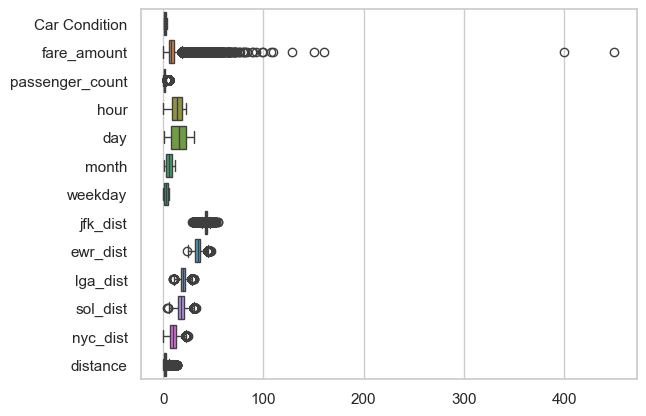

In [25]:
sns.boxplot(data[num_features].drop(columns=['year','bearing','pickup_longitude_degrees', 'pickup_latitude_degrees',
       'dropoff_longitude_degrees', 'dropoff_latitude_degrees']),orient='h')
plt.show()

In [26]:
columns = ['fare_amount']
remove_outliers(data, columns).shape

(405121, 26)

In [27]:
df = data.copy()

In [28]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

data['target_log'] = np.log1p(data['fare_amount'])
data['target_sqrt'] = np.sqrt(data['fare_amount'])

data['target_boxcox'], _ = boxcox(data['fare_amount'] + 1)  # Add 1 to handle zero values
target_pt = PowerTransformer(method='yeo-johnson')
data['target_yeojohnson'] = target_pt.fit_transform(data[['fare_amount']])
df['fare_amount'] = data['target_yeojohnson']

In [29]:
transformed_skewness_log = skew(data['target_log'])
transformed_skewness_sqrt = skew(data['target_sqrt'])
transformed_skewness_boxcox = skew(data['target_boxcox'])
transformed_skewness_yeojohnson = skew(data['target_yeojohnson'])

print(f'Log Transformation Skewness: {transformed_skewness_log:.4f}')
print(f'Square Root Transformation Skewness: {transformed_skewness_sqrt:.4f}')
print(f'Box-Cox Transformation Skewness: {transformed_skewness_boxcox:.4f}')
print(f'Yeo-Johnson Transformation Skewness: {transformed_skewness_yeojohnson:.4f}')


Log Transformation Skewness: 0.4580
Square Root Transformation Skewness: 1.1753
Box-Cox Transformation Skewness: 0.0183
Yeo-Johnson Transformation Skewness: 0.0183


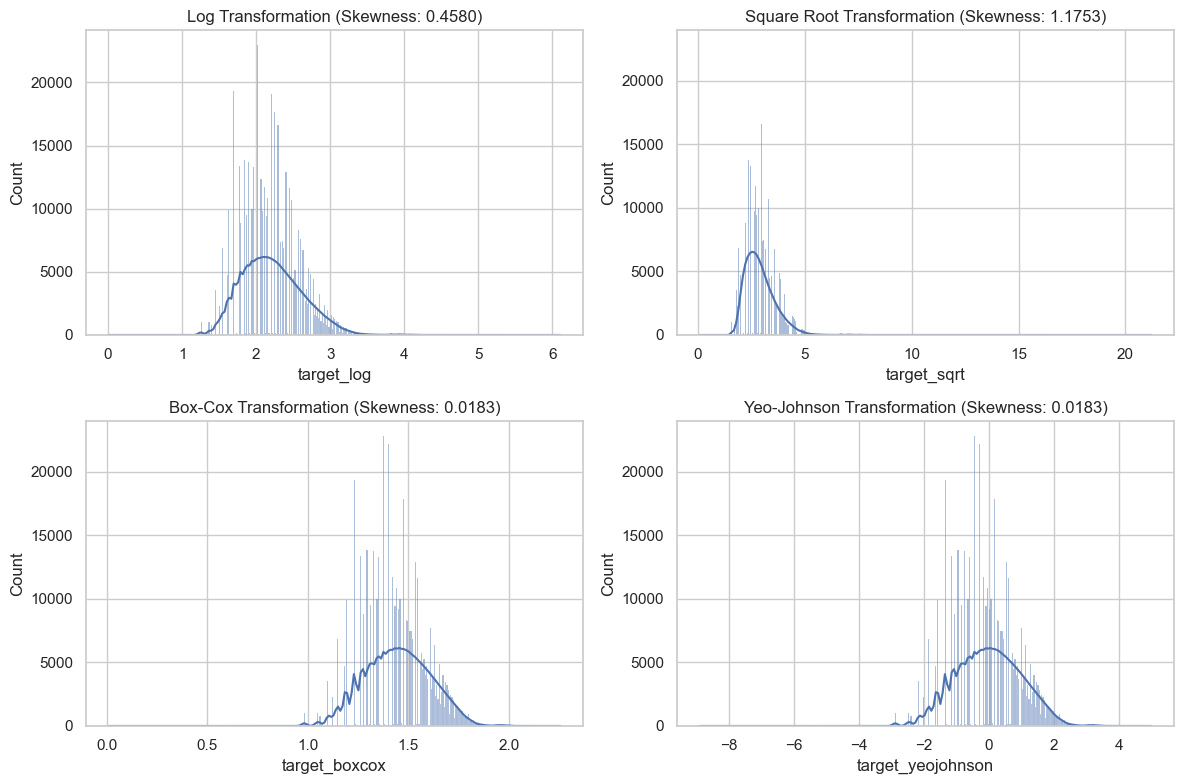

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['target_log'], kde=True)
plt.title(f'Log Transformation (Skewness: {transformed_skewness_log:.4f})')

plt.subplot(2, 2, 2)
sns.histplot(data['target_sqrt'], kde=True)
plt.title(f'Square Root Transformation (Skewness: {transformed_skewness_sqrt:.4f})')

plt.subplot(2, 2, 3)
sns.histplot(data['target_boxcox'], kde=True)
plt.title(f'Box-Cox Transformation (Skewness: {transformed_skewness_boxcox:.4f})')

plt.subplot(2, 2, 4)
sns.histplot(data['target_yeojohnson'], kde=True)
plt.title(f'Yeo-Johnson Transformation (Skewness: {transformed_skewness_yeojohnson:.4f})')

plt.tight_layout()
plt.show()

We will choose Power Transformation for `Fare Amount`
> note: it could be reversed easily

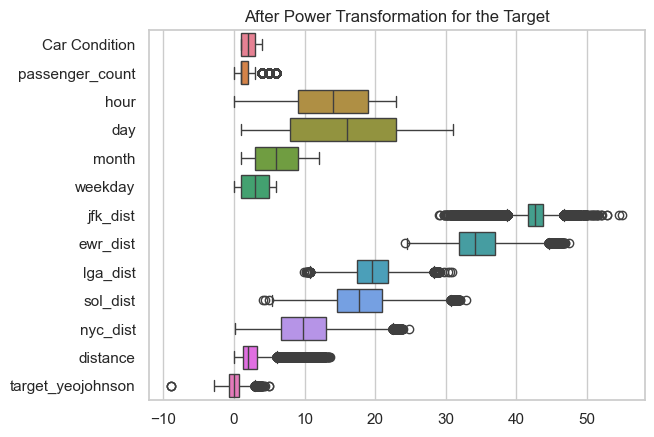

In [31]:
ff = list(num_features)+['target_yeojohnson']

sns.boxplot(data[ff].drop(columns=['year','bearing','pickup_longitude_degrees', 'pickup_latitude_degrees',
       'dropoff_longitude_degrees', 'dropoff_latitude_degrees','fare_amount']),orient='h')
plt.title('After Power Transformation for the Target')
plt.show()

it seems that the target needs a little cleaning and outlires removal after all..

In [32]:
data = remove_outliers(data, ['target_yeojohnson'])
df = remove_outliers(df, ['fare_amount'])

#### Distance Transformation

In [33]:
target_skewness = skew(data['distance'])
print(f'Original Skewness of Distance column: {target_skewness:.3f}')


data['distance_log'] = np.log1p(data['distance'])
data['distance_sqrt'] = np.sqrt(data['distance'])
data['distance_boxcox'], _ = boxcox(data['distance'] + 1) 
pt = PowerTransformer(method='yeo-johnson')
data['distance_yeojohnson'] = pt.fit_transform(data[['distance']])


transformed_skewness_log = skew(data['distance_log'])
transformed_skewness_sqrt = skew(data['distance_sqrt'])
transformed_skewness_boxcox = skew(data['distance_boxcox'])
transformed_skewness_yeojohnson = skew(data['distance_yeojohnson'])

print(f'Log Transformation Skewness: {transformed_skewness_log:.3f}')
print(f'Square Root Transformation Skewness: {transformed_skewness_sqrt:.3f}')
print(f'Box-Cox Transformation Skewness: {transformed_skewness_boxcox:.3f}')
print(f'Yeo-Johnson Transformation Skewness: {transformed_skewness_yeojohnson:.3f}')

Original Skewness of Distance column: 1.444
Log Transformation Skewness: 0.335
Square Root Transformation Skewness: 0.582
Box-Cox Transformation Skewness: 0.021
Yeo-Johnson Transformation Skewness: 0.021


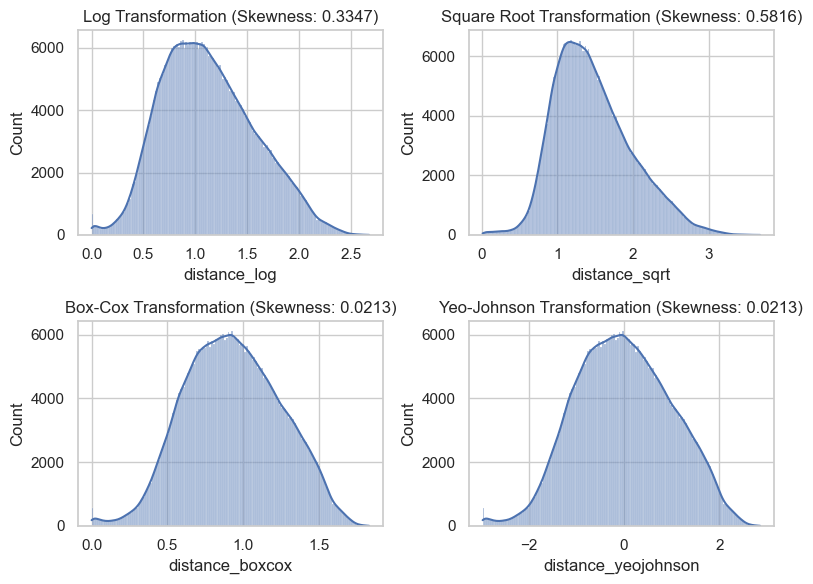

In [34]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['distance_log'], kde=True)
plt.title(f'Log Transformation (Skewness: {transformed_skewness_log:.4f})')

plt.subplot(2, 2, 2)
sns.histplot(data['distance_sqrt'], kde=True)
plt.title(f'Square Root Transformation (Skewness: {transformed_skewness_sqrt:.4f})')

plt.subplot(2, 2, 3)
sns.histplot(data['distance_boxcox'], kde=True)
plt.title(f'Box-Cox Transformation (Skewness: {transformed_skewness_boxcox:.4f})')

plt.subplot(2, 2, 4)
sns.histplot(data['distance_yeojohnson'], kde=True)
plt.title(f'Yeo-Johnson Transformation (Skewness: {transformed_skewness_yeojohnson:.4f})')

plt.tight_layout()
plt.show()

i will do power transformation also for `distance`

In [35]:
df['distance'] = data['distance_yeojohnson']

### Preprocessing Pipeline

In [36]:
data = df.copy()

In [37]:
data.head(2)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_longitude_degrees,pickup_latitude_degrees,dropoff_longitude_degrees,dropoff_latitude_degrees
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,4,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,1.564682,2010-01-05 16:52:16,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,2.205630,-21.498366,-74.016048,40.711303,-73.979268,40.782004
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,1,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,-0.749544,2011-08-18 00:35:00,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,-0.534113,148.966789,-73.982738,40.761270,-73.991242,40.750562


In [38]:
del df

In [39]:
print(list(data.columns))

['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather', 'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing', 'pickup_longitude_degrees', 'pickup_latitude_degrees', 'dropoff_longitude_degrees', 'dropoff_latitude_degrees']


In [40]:
to_drop_features = ['User ID','User Name','Driver Name','key','pickup_datetime']
cat_columns = ['Weather','Traffic Condition']
num_columns = ['passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing', 'pickup_longitude_degrees', 'pickup_latitude_degrees',
       'dropoff_longitude_degrees', 'dropoff_latitude_degrees','Car Condition']

y_label = 'fare_amount'

In [41]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from lazypredict import LazyRegressor

from sklearn import set_config
set_config(display='diagram',transform_output='pandas')

In [42]:
X, y = data.drop(columns=[y_label]), data[y_label]

In [43]:
X_train, X_test, y_train_t, y_test_t = train_test_split(X,y, train_size=.7, random_state=32)

y_train_t = np.array(y_train_t).reshape(-1,1)
y_test_t = np.array(y_test_t).reshape(-1,1)

y_train = target_pt.inverse_transform(y_train_t)
y_test = target_pt.inverse_transform(y_test_t)

In [44]:
y_train[:5], y_train_t[:5]

(array([[ 6.5],
        [12.1],
        [ 6.9],
        [11.5],
        [ 5.3]]),
 array([[-0.43464166],
        [ 0.92690895],
        [-0.29436426],
        [ 0.82395055],
        [-0.92758653]]))

In [45]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('normalize',StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

col_transformer = ColumnTransformer(
    transformers=[
        ('numerical',num_pipeline,num_columns),
        ('categorical',cat_pipeline, cat_columns),
        ('todrop', 'drop',to_drop_features)
    ],remainder='passthrough',verbose_feature_names_out=False
)

preprocessing = make_pipeline(col_transformer)
preprocessing_skbest_f = make_pipeline(col_transformer, SelectKBest(score_func=f_regression,k=15))
preprocessing_skbest_mir = make_pipeline(col_transformer, SelectKBest(score_func=mutual_info_regression,k=15))
preprocessing_pca = make_pipeline(col_transformer, PCA(n_components=15))

### Basic Preprocessing

In [46]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

In [47]:
X_train_prepared.sample(3)

,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_longitude_degrees,pickup_latitude_degrees,dropoff_longitude_degrees,dropoff_latitude_degrees,Car Condition,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
366103,-0.52,-2.15,-1.46,-0.08,1.53,0.15,-5.16,0.73,-0.12,-0.25,-0.14,-0.80,-1.00,1.49,-1.82,2.16,-1.67,-1.34,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
212216,-0.52,-1.05,-0.42,-1.24,-0.53,1.22,-0.45,0.20,-0.44,0.14,0.07,-0.63,-0.47,0.12,-0.17,0.48,0.28,1.34,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
403667,-0.52,-1.99,0.61,0.80,1.02,0.68,-0.54,-1.41,1.46,-1.48,-1.57,-0.68,-1.31,-1.45,-1.13,-0.64,-1.28,-0.45,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


#### Model Selection

#### Linear Regresssion

In [48]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [49]:
LR = LinearRegression()
LR.fit(X_train_prepared, y_train_t)

# Predict using Linear Regression model
y_train_pred_t_lr = LR.predict(X_train_prepared)
y_test_pred_t_lr = LR.predict(X_test_prepared)

# Inverse transform the predictions to the original scale
y_train_pred_lr = target_pt.inverse_transform(y_train_pred_t_lr)
y_test_pred_lr = target_pt.inverse_transform(y_test_pred_t_lr)

# Evaluate Linear Regression model on the original scale
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

train_rmse_lr = root_mean_squared_error(y_train, y_train_pred_lr)
test_rmse_lr = root_mean_squared_error(y_test, y_test_pred_lr)

print("Linear Regression - Train MAE:", train_mae_lr)
print("Linear Regression - Test MAE:", test_mae_lr)
print("Linear Regression - Train RMSE:", train_rmse_lr)
print("Linear Regression - Test RMSE:", test_rmse_lr)
print('-'*50)

Linear Regression - Train MAE: 1.5258014012790428
Linear Regression - Test MAE: 1.5253931094440691
Linear Regression - Train RMSE: 2.4094392978075674
Linear Regression - Test RMSE: 2.3957942667830676
--------------------------------------------------


#### Stochastic Gradient Descent

In [50]:
# Fit SGD Regressor model
SGD = SGDRegressor(max_iter=1000, tol=1e-3, loss='squared_error',early_stopping=True, n_iter_no_change=10, random_state=3)
SGD.fit(X_train_prepared, y_train_t.ravel())

# Predict using SGD Regressor model
y_train_pred_t_sgd = SGD.predict(X_train_prepared).reshape(-1, 1)
y_test_pred_t_sgd = SGD.predict(X_test_prepared).reshape(-1, 1)

# Inverse transform the predictions to the original scale
y_train_pred_sgd = target_pt.inverse_transform(y_train_pred_t_sgd)
y_test_pred_sgd = target_pt.inverse_transform(y_test_pred_t_sgd)

# Evaluate SGD Regressor model on the original scale
train_mae_sgd = mean_absolute_error(y_train, y_train_pred_sgd)
test_mae_sgd = mean_absolute_error(y_test, y_test_pred_sgd)

train_rmse_sgd = root_mean_squared_error(y_train, y_train_pred_sgd)
test_rmse_sgd = root_mean_squared_error(y_test, y_test_pred_sgd)

print("SGD Regressor - Train MAE:", train_mae_sgd)
print("SGD Regressor - Test MAE:", test_mae_sgd)
print("SGD Regressor - Train RMSE:", train_rmse_sgd)
print("SGD Regressor - Test RMSE:", test_rmse_sgd)
print('-'*50)

SGD Regressor - Train MAE: 1.5261947222243062
SGD Regressor - Test MAE: 1.525552765464368
SGD Regressor - Train RMSE: 2.4079372059864728
SGD Regressor - Test RMSE: 2.3941973269189454
--------------------------------------------------


### Generic Evaluation Function

In [51]:
def test_preprocessing(X_train, X_test, y_train, y_test, y_train_t, y_test_t, preprocessing, target_pt, models):
    
    X_train_prepared = preprocessing.fit_transform(X_train,y_train_t)
    X_test_prepared = preprocessing.transform(X_test)

    performance_df = pd.DataFrame(columns=['Model', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'])
    fitted_models = []

    for model in models:
        model_name = model.__class__.__name__

        model.fit(X_train_prepared, y_train_t.ravel())

        y_train_pred_t = model.predict(X_train_prepared).reshape(-1, 1)
        y_test_pred_t = model.predict(X_test_prepared).reshape(-1, 1)

        # Inverse transform the predictions to the original scale
        y_train_pred = target_pt.inverse_transform(y_train_pred_t).flatten()
        y_test_pred = target_pt.inverse_transform(y_test_pred_t).flatten()

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_rmse = root_mean_squared_error(y_train, y_train_pred)
        test_rmse = root_mean_squared_error(y_test, y_test_pred)

        new_row = pd.DataFrame({
            'Model': [model_name],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae],
            'Train RMSE': [train_rmse],
            'Test RMSE': [test_rmse]
        })
        
        performance_df = pd.concat([performance_df, new_row], ignore_index=True)
        
        fitted_models.append(model)

        print(f"{model_name} - Train MAE: {train_mae}")
        print(f"{model_name} - Test MAE: {test_mae}")
        print(f"{model_name} - Train RMSE: {train_rmse}")
        print(f"{model_name} - Test RMSE: {test_rmse}")
        print('-' * 50)

    return performance_df, fitted_models

In [52]:
models = [
    LinearRegression(),
    SGDRegressor(max_iter=10_000, tol=1e-3, learning_rate='adaptive',loss='squared_error', early_stopping=True, n_iter_no_change=15, random_state=8),
    RandomForestRegressor(n_estimators=200,max_depth=6,n_jobs=-1,random_state=33),
]
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing, target_pt, models)
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LinearRegression - Train MAE: 1.5258014012790428
LinearRegression - Test MAE: 1.5253931094440691
LinearRegression - Train RMSE: 2.4094392978075674
LinearRegression - Test RMSE: 2.3957942667830676
--------------------------------------------------
SGDRegressor - Train MAE: 1.5250770562821607
SGDRegressor - Test MAE: 1.5246980566824244
SGDRegressor - Train RMSE: 2.4077291041396958
SGDRegressor - Test RMSE: 2.3941918272920337
--------------------------------------------------
RandomForestRegressor - Train MAE: 1.5042418026135695
RandomForestRegressor - Test MAE: 1.503215280624909
RandomForestRegressor - Train RMSE: 2.375332025476324
RandomForestRegressor - Test RMSE: 2.3602080979288957
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
2,RandomForestRegressor,1.50,1.50,2.38,2.36
1,SGDRegressor,1.53,1.52,2.41,2.39
0,LinearRegression,1.53,1.53,2.41,2.40


## Ways For Feature Selection

### F_Regression Score Function

In [53]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_skbest_f, target_pt, models)
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LinearRegression - Train MAE: 1.526825148917386
LinearRegression - Test MAE: 1.5259164151034141
LinearRegression - Train RMSE: 2.4105752704382923
LinearRegression - Test RMSE: 2.396421063910737
--------------------------------------------------
SGDRegressor - Train MAE: 1.5260774865928417
SGDRegressor - Test MAE: 1.5251997951189429
SGDRegressor - Train RMSE: 2.4088091213694276
SGDRegressor - Test RMSE: 2.3947663594359554
--------------------------------------------------
RandomForestRegressor - Train MAE: 1.5042419578808808
RandomForestRegressor - Test MAE: 1.5032143801103102
RandomForestRegressor - Train RMSE: 2.3753326429469186
RandomForestRegressor - Test RMSE: 2.360208028834982
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
2,RandomForestRegressor,1.50,1.50,2.38,2.36
1,SGDRegressor,1.53,1.53,2.41,2.39
0,LinearRegression,1.53,1.53,2.41,2.40


### Mutual Infromation Regression

In [54]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_skbest_mir, target_pt, models)
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LinearRegression - Train MAE: 1.526825148917386
LinearRegression - Test MAE: 1.5259164151034141
LinearRegression - Train RMSE: 2.4105752704382923
LinearRegression - Test RMSE: 2.396421063910737
--------------------------------------------------
SGDRegressor - Train MAE: 1.5260774865928417
SGDRegressor - Test MAE: 1.5251997951189429
SGDRegressor - Train RMSE: 2.4088091213694276
SGDRegressor - Test RMSE: 2.3947663594359554
--------------------------------------------------
RandomForestRegressor - Train MAE: 1.5042419578808808
RandomForestRegressor - Test MAE: 1.5032143801103102
RandomForestRegressor - Train RMSE: 2.3753326429469186
RandomForestRegressor - Test RMSE: 2.360208028834982
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
2,RandomForestRegressor,1.50,1.50,2.38,2.36
1,SGDRegressor,1.53,1.53,2.41,2.39
0,LinearRegression,1.53,1.53,2.41,2.40


### PCA (dimentionality Reduction)

In [55]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_pca, target_pt, models)
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LinearRegression - Train MAE: 1.546996601519159
LinearRegression - Test MAE: 1.5457037661066837
LinearRegression - Train RMSE: 2.4244656385351506
LinearRegression - Test RMSE: 2.4088848568023553
--------------------------------------------------
SGDRegressor - Train MAE: 1.5467302826049194
SGDRegressor - Test MAE: 1.5454455926480744
SGDRegressor - Train RMSE: 2.42390044440185
SGDRegressor - Test RMSE: 2.4083284529473947
--------------------------------------------------
RandomForestRegressor - Train MAE: 1.9989592682819852
RandomForestRegressor - Test MAE: 2.009171741151139
RandomForestRegressor - Train RMSE: 2.9550032889471582
RandomForestRegressor - Test RMSE: 2.9534186816388783
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
1,SGDRegressor,1.55,1.55,2.42,2.41
0,LinearRegression,1.55,1.55,2.42,2.41
2,RandomForestRegressor,2.00,2.01,2.96,2.95


### LASSO Regression

In [56]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing, target_pt, [Lasso(max_iter=10_000,random_state=34,alpha=.001)])
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

Lasso - Train MAE: 1.5265006049691905
Lasso - Test MAE: 1.5257011462974353
Lasso - Train RMSE: 2.4099046119988166
Lasso - Test RMSE: 2.3959389843683128
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,Lasso,1.53,1.53,2.41,2.40


In [57]:
fitted_models[0].coef_

array([ 1.20635346e-02,  1.46517746e-02,  1.17911128e-03,  4.20819313e-02,
       -1.76202092e-02,  1.66118476e-01, -9.59672128e-02, -1.30080963e-01,
       -4.54060202e-02, -0.00000000e+00,  1.51118657e-01,  8.28965355e-01,
       -8.46306459e-02, -0.00000000e+00,  2.50874632e-02, -1.12112612e-01,
       -1.73266471e-02,  6.02026609e-04,  4.72240143e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

---

Ok, let's stick with `Mutual Infromation Regression` score function. It different from other f_regression method that it can detect non-linearity relation wich may harm the model performance if getting ignored using linear methods.

In [58]:
from copy import deepcopy

In [59]:
# final_pipeline = deepcopy(preprocessing_skbest_mir)
final_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('normalize',
                                                                   StandardScaler())]),
                                                  ['passenger_count', 'hour',
                                                   'day', 'month', 'weekday',
                                                   'year', 'jfk_dist',
                                                   'ewr_dist', 'lga_dist',
                                                   'sol_dist', 'nyc_dist',
                                                   'distance', 'bearing',
                                                   'pickup_longitude_...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Weather',
                                                   'Traffic Condition']),
                                                 ('todrop', 'drop',
                                                  ['User ID', 'User Name',
                                                   'Driver Name', 'key',
                                                   'pickup_datetime'])],
                                   verbose_feature_names_out=False)),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_regression at 0x0000021B01232E80>))])

In [64]:
val_index = int(len(X_test)*.4)

X_train_prepared = preprocessing_skbest_mir.fit_transform(X_train,y_train_t)
X_test_prepared = preprocessing_skbest_mir.transform(X_test)
X_val,y_val = X_test_prepared[:val_index], y_test_t[:val_index]

In [67]:
from catboost import CatBoostRegressor

In [72]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_skbest_mir, target_pt,
                                                   [
        
         XGBRegressor(
            n_estimators=1000, 
            learning_rate=0.05, 
            max_depth=4, 
            random_state=34,
            device='cuda',
        ),
        LGBMRegressor(
            n_estimators=1000, 
            learning_rate=0.05, 
            max_depth=4,
            n_jobs=-1,
            random_state=34,
            verbose=0
        ),
        CatBoostRegressor(
            iterations=1000, 
            learning_rate=0.05, 
            depth=4,
            task_type="GPU",
            devices='0',
            random_seed=34,
            verbose=0  
        )
    ]
                                                  
                                                  )
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

XGBRegressor - Train MAE: 1.182785435156141
XGBRegressor - Test MAE: 1.1952360476747983
XGBRegressor - Train RMSE: 2.009406951735377
XGBRegressor - Test RMSE: 2.018511953101991
--------------------------------------------------
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,XGBRegressor,1.18,1.20,2.01,2.02
1,LGBMRegressor,1.18,1.19,2.02,2.02
2,CatBoostRegressor,1.21,1.22,2.06,2.05


In [73]:
performance_df

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,XGBRegressor,1.18,1.20,2.01,2.02
1,LGBMRegressor,1.18,1.19,2.02,2.02
2,CatBoostRegressor,1.21,1.22,2.06,2.05


> We will continue with `LGBMRegressor`

## Fine-Tuning Light Gradient Boost Regressor

In [78]:
import optuna
import lightgbm as lgb

In [88]:
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'min_split_gain': trial.suggest_loguniform('min_split_gain', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
        'max_depth': trial.suggest_int('max_depth', -1, 12),
        'max_bin': trial.suggest_int('max_bin', 2, 255),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }
    
    train_data = lgb.Dataset(X_train_prepared, label=y_train_t)
    valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    gbm = lgb.train(param, train_data, valid_sets=[valid_data])
    
    y_pred_t = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    
    y_pred = target_pt.inverse_transform(y_pred_t.reshape(-1, 1)).flatten()
    y_val_ = target_pt.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    rmse = mean_squared_error(y_val_, y_pred, squared=False)
    return rmse

In [89]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-08-03 03:47:46,193] A new study created in memory with name: no-name-ed174cd0-f6a4-4fe7-8377-fa5fe7b09fad
[I 2024-08-03 03:47:46,886] Trial 0 finished with value: 4.484972856186681 and parameters: {'num_leaves': 255, 'learning_rate': 1.2371246075944812e-07, 'feature_fraction': 0.5570106156175287, 'bagging_fraction': 0.7526906837293321, 'bagging_freq': 4, 'min_child_samples': 56, 'lambda_l1': 8.013480018222509e-06, 'lambda_l2': 6.422737922603476, 'min_split_gain': 0.00016748306073667674, 'subsample': 0.6676179828780084, 'subsample_freq': 5, 'max_depth': 7, 'max_bin': 111, 'colsample_bytree': 0.572926791194269, 'reg_alpha': 1.586758114658718e-05, 'reg_lambda': 3.5852826091356937}. Best is trial 0 with value: 4.484972856186681.


[I 2024-08-03 03:47:47,523] Trial 1 finished with value: 4.4849794557986264 and parameters: {'num_leaves': 57, 'learning_rate': 6.470244768939573e-08, 'feature_fraction': 0.9135128840244393, 'bagging_fraction': 0.46838050806865955, 'bagging_freq': 7, 'min_child_samples': 15, 'lambda_l1': 1.3226970287007275e-05, 'lambda_l2': 1.0254000742025756e-06, 'min_split_gain': 0.0009026767717628458, 'subsample': 0.8144625171480859, 'subsample_freq': 3, 'max_depth': 10, 'max_bin': 48, 'colsample_bytree': 0.7063495938196006, 'reg_alpha': 6.33421063505021e-08, 'reg_lambda': 0.00022426082553114266}. Best is trial 0 with value: 4.484972856186681.


[I 2024-08-03 03:47:48,469] Trial 2 finished with value: 2.0243394382804327 and parameters: {'num_leaves': 195, 'learning_rate': 0.06397920107524026, 'feature_fraction': 0.9300642776376207, 'bagging_fraction': 0.727892609187808, 'bagging_freq': 7, 'min_child_samples': 85, 'lambda_l1': 0.017964634123187325, 'lambda_l2': 0.13383999983960698, 'min_split_gain': 0.0009184338032214403, 'subsample': 0.6034601273149801, 'subsample_freq': 5, 'max_depth': 8, 'max_bin': 111, 'colsample_bytree': 0.9899771036502042, 'reg_alpha': 3.2601211594009804e-06, 'reg_lambda': 3.568376283791237e-07}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:49,288] Trial 3 finished with value: 4.447843204870554 and parameters: {'num_leaves': 197, 'learning_rate': 0.00021658617608939803, 'feature_fraction': 0.5589827176365927, 'bagging_fraction': 0.7348770700624843, 'bagging_freq': 7, 'min_child_samples': 76, 'lambda_l1': 0.03498537405052964, 'lambda_l2': 9.295256985135602, 'min_split_gain': 0.9068546495374314, 'subsample': 0.6635678369531715, 'subsample_freq': 4, 'max_depth': 8, 'max_bin': 48, 'colsample_bytree': 0.6387965210247244, 'reg_alpha': 0.000766503889672764, 'reg_lambda': 6.218022059869283e-06}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:50,289] Trial 4 finished with value: 2.7106914919490697 and parameters: {'num_leaves': 181, 'learning_rate': 0.01469713271135919, 'feature_fraction': 0.5403191175899882, 'bagging_fraction': 0.47402835276928734, 'bagging_freq': 7, 'min_child_samples': 96, 'lambda_l1': 0.2516376904595554, 'lambda_l2': 7.2932969843849e-05, 'min_split_gain': 7.693108296465545e-08, 'subsample': 0.4907892804483836, 'subsample_freq': 5, 'max_depth': -1, 'max_bin': 68, 'colsample_bytree': 0.8378847903458243, 'reg_alpha': 2.125278936258344, 'reg_lambda': 0.05185553587083674}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:51,640] Trial 5 finished with value: 4.465722023968498 and parameters: {'num_leaves': 242, 'learning_rate': 8.501255903218653e-05, 'feature_fraction': 0.8426034692254691, 'bagging_fraction': 0.5944820597632303, 'bagging_freq': 6, 'min_child_samples': 61, 'lambda_l1': 1.37520358078888e-05, 'lambda_l2': 2.875616730396832e-06, 'min_split_gain': 2.731576181341485e-07, 'subsample': 0.4497646225757598, 'subsample_freq': 5, 'max_depth': -1, 'max_bin': 115, 'colsample_bytree': 0.9832848170378201, 'reg_alpha': 0.0013886592071490637, 'reg_lambda': 0.016566864325899343}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:52,217] Trial 6 finished with value: 2.3699528169700974 and parameters: {'num_leaves': 171, 'learning_rate': 0.031970785156002816, 'feature_fraction': 0.4791121873413487, 'bagging_fraction': 0.5325426001612429, 'bagging_freq': 4, 'min_child_samples': 5, 'lambda_l1': 0.013631446671842956, 'lambda_l2': 0.029454367655759532, 'min_split_gain': 6.889619755273817e-06, 'subsample': 0.8631113169178468, 'subsample_freq': 9, 'max_depth': 6, 'max_bin': 82, 'colsample_bytree': 0.7916606697341265, 'reg_alpha': 0.11149478143787935, 'reg_lambda': 0.00031626910057147247}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:53,386] Trial 7 finished with value: 4.484848154799395 and parameters: {'num_leaves': 244, 'learning_rate': 7.262388906563806e-07, 'feature_fraction': 0.506521368398905, 'bagging_fraction': 0.5337412608491742, 'bagging_freq': 2, 'min_child_samples': 27, 'lambda_l1': 3.962346781346678, 'lambda_l2': 0.011284578534385825, 'min_split_gain': 1.0165911654957063e-07, 'subsample': 0.7684431031050378, 'subsample_freq': 3, 'max_depth': 0, 'max_bin': 101, 'colsample_bytree': 0.7153510142834585, 'reg_alpha': 5.4709078373776416e-05, 'reg_lambda': 3.0635134660665087e-07}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:53,972] Trial 8 finished with value: 2.1924951317920915 and parameters: {'num_leaves': 214, 'learning_rate': 0.05313612957313058, 'feature_fraction': 0.5174075321577203, 'bagging_fraction': 0.7982093574899077, 'bagging_freq': 7, 'min_child_samples': 31, 'lambda_l1': 0.0008621594941421243, 'lambda_l2': 0.021183062834720438, 'min_split_gain': 0.0003949954961036707, 'subsample': 0.7018038576319157, 'subsample_freq': 9, 'max_depth': 6, 'max_bin': 14, 'colsample_bytree': 0.9595312577464892, 'reg_alpha': 0.00019145661690974551, 'reg_lambda': 7.560621707696111e-07}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:55,073] Trial 9 finished with value: 3.961841851558013 and parameters: {'num_leaves': 249, 'learning_rate': 0.0025416626677410414, 'feature_fraction': 0.9573480278252261, 'bagging_fraction': 0.4164563516142635, 'bagging_freq': 4, 'min_child_samples': 83, 'lambda_l1': 0.002157201095623275, 'lambda_l2': 2.7602821540056896e-08, 'min_split_gain': 0.0002769587491575866, 'subsample': 0.9920405742285475, 'subsample_freq': 10, 'max_depth': 11, 'max_bin': 234, 'colsample_bytree': 0.6853778932274781, 'reg_alpha': 0.0009287513229701934, 'reg_lambda': 4.858923747525082e-06}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:55,477] Trial 10 finished with value: 2.1295023456883753 and parameters: {'num_leaves': 107, 'learning_rate': 0.6743453857740893, 'feature_fraction': 0.7354437531266311, 'bagging_fraction': 0.9090416361640581, 'bagging_freq': 1, 'min_child_samples': 100, 'lambda_l1': 2.7490031758113854e-08, 'lambda_l2': 0.23243706764292396, 'min_split_gain': 0.04216635723788149, 'subsample': 0.5665667360051332, 'subsample_freq': 0, 'max_depth': 2, 'max_bin': 183, 'colsample_bytree': 0.8792655490912402, 'reg_alpha': 1.4594546262990318e-08, 'reg_lambda': 1.0446759511287748e-08}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:55,938] Trial 11 finished with value: 2.0601594343904215 and parameters: {'num_leaves': 100, 'learning_rate': 0.9137937805296766, 'feature_fraction': 0.74953501216882, 'bagging_fraction': 0.9723701759205423, 'bagging_freq': 1, 'min_child_samples': 97, 'lambda_l1': 3.359505104051195e-08, 'lambda_l2': 0.20527682268743647, 'min_split_gain': 0.060325061158386505, 'subsample': 0.5557836866328723, 'subsample_freq': 0, 'max_depth': 3, 'max_bin': 177, 'colsample_bytree': 0.4322877356870754, 'reg_alpha': 1.6644028471590542e-08, 'reg_lambda': 1.2481392315406448e-08}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:56,451] Trial 12 finished with value: 2.0575395697968566 and parameters: {'num_leaves': 123, 'learning_rate': 0.8902315758412702, 'feature_fraction': 0.7389785979242757, 'bagging_fraction': 0.982275070145657, 'bagging_freq': 2, 'min_child_samples': 78, 'lambda_l1': 2.79441489580444e-08, 'lambda_l2': 0.0006109186580151478, 'min_split_gain': 0.018708371339761463, 'subsample': 0.5621012278900672, 'subsample_freq': 0, 'max_depth': 3, 'max_bin': 167, 'colsample_bytree': 0.41032321398634886, 'reg_alpha': 5.42550983421428e-07, 'reg_lambda': 3.018604060287567e-08}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:56,967] Trial 13 finished with value: 4.3826545211333015 and parameters: {'num_leaves': 144, 'learning_rate': 0.0005785415662654111, 'feature_fraction': 0.8220706362642951, 'bagging_fraction': 0.8513510814914751, 'bagging_freq': 3, 'min_child_samples': 72, 'lambda_l1': 5.913776059112494e-07, 'lambda_l2': 0.0003160396976786391, 'min_split_gain': 0.010639497773616488, 'subsample': 0.40345431106637325, 'subsample_freq': 7, 'max_depth': 3, 'max_bin': 158, 'colsample_bytree': 0.4237600078792732, 'reg_alpha': 2.8339055747232554e-06, 'reg_lambda': 7.315227425668687e-08}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:57,490] Trial 14 finished with value: 4.483784854537196 and parameters: {'num_leaves': 40, 'learning_rate': 7.117518775521765e-06, 'feature_fraction': 0.6635751192254714, 'bagging_fraction': 0.6524581230815543, 'bagging_freq': 5, 'min_child_samples': 40, 'lambda_l1': 0.00014388606743319864, 'lambda_l2': 0.0018280207235544252, 'min_split_gain': 7.224878010190811e-06, 'subsample': 0.5628664679015328, 'subsample_freq': 2, 'max_depth': 4, 'max_bin': 150, 'colsample_bytree': 0.5301244547452664, 'reg_alpha': 7.032118083165923e-07, 'reg_lambda': 3.4519197267865284e-05}. Best is trial 2 with value: 2.0243394382804327.


[I 2024-08-03 03:47:58,594] Trial 15 finished with value: 1.98203911115519 and parameters: {'num_leaves': 140, 'learning_rate': 0.1601809017842411, 'feature_fraction': 0.9904725428045071, 'bagging_fraction': 0.9989873651600778, 'bagging_freq': 2, 'min_child_samples': 86, 'lambda_l1': 6.170439000929888, 'lambda_l2': 2.4863973853004676e-05, 'min_split_gain': 0.002689299536738761, 'subsample': 0.6120700388463038, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 220, 'colsample_bytree': 0.5067283417924823, 'reg_alpha': 9.727045073872605e-07, 'reg_lambda': 3.01953881070392e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:47:59,760] Trial 16 finished with value: 3.5921022908028397 and parameters: {'num_leaves': 154, 'learning_rate': 0.004667711492930067, 'feature_fraction': 0.9995659419522188, 'bagging_fraction': 0.6622162260912604, 'bagging_freq': 5, 'min_child_samples': 87, 'lambda_l1': 1.2224364227839253, 'lambda_l2': 2.192615949070289e-05, 'min_split_gain': 0.0026014871821362917, 'subsample': 0.6408018608574247, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 253, 'colsample_bytree': 0.5209911078082988, 'reg_alpha': 9.6057359827522e-06, 'reg_lambda': 6.927827149867133e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:00,304] Trial 17 finished with value: 2.3071503940805886 and parameters: {'num_leaves': 6, 'learning_rate': 0.051481971238025157, 'feature_fraction': 0.8898427082323802, 'bagging_fraction': 0.8976568231306984, 'bagging_freq': 3, 'min_child_samples': 67, 'lambda_l1': 8.671491471158866, 'lambda_l2': 1.304982833652326e-08, 'min_split_gain': 1.9534322198843214e-05, 'subsample': 0.7384630665139673, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 230, 'colsample_bytree': 0.8926450825321351, 'reg_alpha': 2.126035044840779e-07, 'reg_lambda': 0.0050751273754558275}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:01,573] Trial 18 finished with value: 4.479687107687529 and parameters: {'num_leaves': 78, 'learning_rate': 2.3181961490731665e-05, 'feature_fraction': 0.993919498336536, 'bagging_fraction': 0.8150650438170721, 'bagging_freq': 2, 'min_child_samples': 45, 'lambda_l1': 0.11026371138331534, 'lambda_l2': 3.4312936991591903e-07, 'min_split_gain': 0.6380998307565435, 'subsample': 0.6074540122045439, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 207, 'colsample_bytree': 0.769115050215482, 'reg_alpha': 0.016899836449135733, 'reg_lambda': 6.375632131307331e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:03,196] Trial 19 finished with value: 4.10240972720537 and parameters: {'num_leaves': 212, 'learning_rate': 0.0020111636587925668, 'feature_fraction': 0.653696054424258, 'bagging_fraction': 0.9137823270496115, 'bagging_freq': 5, 'min_child_samples': 87, 'lambda_l1': 0.567418773753738, 'lambda_l2': 1.4243572601664139e-05, 'min_split_gain': 4.0216620598774955e-05, 'subsample': 0.493827012387789, 'subsample_freq': 8, 'max_depth': 12, 'max_bin': 140, 'colsample_bytree': 0.6013790866872673, 'reg_alpha': 3.0428045972560512e-06, 'reg_lambda': 0.00012194535684880344}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:04,081] Trial 20 finished with value: 1.9933998870799312 and parameters: {'num_leaves': 163, 'learning_rate': 0.16778011098379603, 'feature_fraction': 0.8229649051167219, 'bagging_fraction': 0.6839250850296165, 'bagging_freq': 6, 'min_child_samples': 65, 'lambda_l1': 0.0074354148126985695, 'lambda_l2': 0.5761203536821685, 'min_split_gain': 1.714746834892607e-06, 'subsample': 0.9030507945931155, 'subsample_freq': 2, 'max_depth': 7, 'max_bin': 195, 'colsample_bytree': 0.5125537409536713, 'reg_alpha': 0.009917245967927835, 'reg_lambda': 1.6419344702158796e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:05,120] Trial 21 finished with value: 1.9875685142502557 and parameters: {'num_leaves': 157, 'learning_rate': 0.17663279388444184, 'feature_fraction': 0.8559262183338238, 'bagging_fraction': 0.6827878145365371, 'bagging_freq': 6, 'min_child_samples': 65, 'lambda_l1': 0.007210223997628848, 'lambda_l2': 0.8810939764548037, 'min_split_gain': 6.175052703420222e-07, 'subsample': 0.9418700537154809, 'subsample_freq': 2, 'max_depth': 8, 'max_bin': 200, 'colsample_bytree': 0.48427901858621725, 'reg_alpha': 0.01021475869654837, 'reg_lambda': 2.096745824392041e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:05,685] Trial 22 finished with value: 2.022385719663455 and parameters: {'num_leaves': 149, 'learning_rate': 0.19695956630730976, 'feature_fraction': 0.8158483838807433, 'bagging_fraction': 0.6519046901231093, 'bagging_freq': 6, 'min_child_samples': 62, 'lambda_l1': 0.00014668270805919437, 'lambda_l2': 0.5644850002704609, 'min_split_gain': 1.270941972527572e-06, 'subsample': 0.9536687706631589, 'subsample_freq': 2, 'max_depth': 5, 'max_bin': 203, 'colsample_bytree': 0.4888159631543763, 'reg_alpha': 0.018119985485440974, 'reg_lambda': 1.1639307285044115e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:06,388] Trial 23 finished with value: 1.9952925819972918 and parameters: {'num_leaves': 125, 'learning_rate': 0.2158476449717409, 'feature_fraction': 0.874790843627774, 'bagging_fraction': 0.5823925452996217, 'bagging_freq': 6, 'min_child_samples': 54, 'lambda_l1': 0.004897832867799381, 'lambda_l2': 1.9671889655735324, 'min_split_gain': 9.611907759828419e-07, 'subsample': 0.9007285307601471, 'subsample_freq': 1, 'max_depth': 7, 'max_bin': 205, 'colsample_bytree': 0.4814267906246121, 'reg_alpha': 0.33509946122776235, 'reg_lambda': 2.098471241701036e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:07,633] Trial 24 finished with value: 2.976623067446233 and parameters: {'num_leaves': 166, 'learning_rate': 0.010076839502476368, 'feature_fraction': 0.7890394128561625, 'bagging_fraction': 0.6804251788878687, 'bagging_freq': 6, 'min_child_samples': 69, 'lambda_l1': 0.08253258895711883, 'lambda_l2': 0.0030100382269597215, 'min_split_gain': 1.0940677003534809e-08, 'subsample': 0.9038359077317336, 'subsample_freq': 3, 'max_depth': 10, 'max_bin': 255, 'colsample_bytree': 0.5712963355302627, 'reg_alpha': 0.009038124938042354, 'reg_lambda': 4.500350472651016e-05}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:08,417] Trial 25 finished with value: 1.9877225947957209 and parameters: {'num_leaves': 99, 'learning_rate': 0.20484008340702062, 'feature_fraction': 0.8603479909742792, 'bagging_fraction': 0.6173096763521437, 'bagging_freq': 3, 'min_child_samples': 48, 'lambda_l1': 0.00031697046893572805, 'lambda_l2': 0.04430650854218265, 'min_split_gain': 8.030263106356347e-07, 'subsample': 0.8195578111741169, 'subsample_freq': 2, 'max_depth': 8, 'max_bin': 221, 'colsample_bytree': 0.47711074509746104, 'reg_alpha': 0.13675700296447635, 'reg_lambda': 6.916699807375797e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:09,374] Trial 26 finished with value: 4.283213660995621 and parameters: {'num_leaves': 90, 'learning_rate': 0.0009449301697448035, 'feature_fraction': 0.956125123404428, 'bagging_fraction': 0.6018175380401671, 'bagging_freq': 3, 'min_child_samples': 46, 'lambda_l1': 0.0005727170080114529, 'lambda_l2': 9.12869976584336e-05, 'min_split_gain': 1.2142167342938136e-08, 'subsample': 0.818588773821245, 'subsample_freq': 1, 'max_depth': 9, 'max_bin': 224, 'colsample_bytree': 0.4546051696726151, 'reg_alpha': 3.3172051606096686, 'reg_lambda': 5.4852636286814526e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:10,370] Trial 27 finished with value: 2.743341732103863 and parameters: {'num_leaves': 128, 'learning_rate': 0.012725545804181322, 'feature_fraction': 0.8718773998808239, 'bagging_fraction': 0.7690095812122697, 'bagging_freq': 3, 'min_child_samples': 33, 'lambda_l1': 2.0565351514495867e-06, 'lambda_l2': 0.010865176674206037, 'min_split_gain': 4.754533958453471e-05, 'subsample': 0.7936670665720693, 'subsample_freq': 4, 'max_depth': 10, 'max_bin': 218, 'colsample_bytree': 0.6346366643876876, 'reg_alpha': 0.06347874597227805, 'reg_lambda': 0.0018220177841927236}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:11,034] Trial 28 finished with value: 1.9899383361822156 and parameters: {'num_leaves': 69, 'learning_rate': 0.20156163958583084, 'feature_fraction': 0.9417679158182891, 'bagging_fraction': 0.6118947610184698, 'bagging_freq': 2, 'min_child_samples': 49, 'lambda_l1': 3.150728814131935e-05, 'lambda_l2': 0.07431125211708178, 'min_split_gain': 2.5908783442897815e-07, 'subsample': 0.8564658158904188, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 240, 'colsample_bytree': 0.5633495770254209, 'reg_alpha': 0.5997230878063913, 'reg_lambda': 1.5064245806184208e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:11,494] Trial 29 finished with value: 4.484891153603297 and parameters: {'num_leaves': 110, 'learning_rate': 8.191452530048035e-07, 'feature_fraction': 0.41842651414347326, 'bagging_fraction': 0.5463319091475702, 'bagging_freq': 1, 'min_child_samples': 56, 'lambda_l1': 7.977503022525232e-05, 'lambda_l2': 2.0743841821284934, 'min_split_gain': 7.695059373204844e-06, 'subsample': 0.7149970137277885, 'subsample_freq': 4, 'max_depth': 5, 'max_bin': 188, 'colsample_bytree': 0.46586717683545065, 'reg_alpha': 8.518285600521843, 'reg_lambda': 1.9785887771021273}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:12,602] Trial 30 finished with value: 3.4246574156675558 and parameters: {'num_leaves': 141, 'learning_rate': 0.006802283818878839, 'feature_fraction': 0.6256771428105543, 'bagging_fraction': 0.8460469195871438, 'bagging_freq': 3, 'min_child_samples': 39, 'lambda_l1': 8.059666283411007e-07, 'lambda_l2': 0.001950492811175207, 'min_split_gain': 0.00010821844989592652, 'subsample': 0.9973957792093164, 'subsample_freq': 1, 'max_depth': 11, 'max_bin': 138, 'colsample_bytree': 0.5459048543058609, 'reg_alpha': 0.00014947074264406033, 'reg_lambda': 3.087436223358939e-05}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:13,323] Trial 31 finished with value: 1.9920322807055244 and parameters: {'num_leaves': 71, 'learning_rate': 0.2178138706311951, 'feature_fraction': 0.9519532193801298, 'bagging_fraction': 0.6384190404104118, 'bagging_freq': 2, 'min_child_samples': 49, 'lambda_l1': 4.6855209945625396e-05, 'lambda_l2': 0.051065967888964746, 'min_split_gain': 2.8052783512742506e-07, 'subsample': 0.8623056547691569, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 241, 'colsample_bytree': 0.5845086748251986, 'reg_alpha': 0.5812308947853473, 'reg_lambda': 1.4851804634510092e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:14,021] Trial 32 finished with value: 2.0173347245797575 and parameters: {'num_leaves': 51, 'learning_rate': 0.11362381154051993, 'feature_fraction': 0.9062872517934577, 'bagging_fraction': 0.7039293979053055, 'bagging_freq': 2, 'min_child_samples': 57, 'lambda_l1': 5.20604540513618e-06, 'lambda_l2': 1.8499922935556723, 'min_split_gain': 3.8557566299176735e-07, 'subsample': 0.952248337420031, 'subsample_freq': 8, 'max_depth': 7, 'max_bin': 217, 'colsample_bytree': 0.56109702818196, 'reg_alpha': 0.09465260638524722, 'reg_lambda': 3.9756333945156664e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:14,496] Trial 33 finished with value: 2.025815532924795 and parameters: {'num_leaves': 24, 'learning_rate': 0.3926477458089422, 'feature_fraction': 0.926589026749457, 'bagging_fraction': 0.6077828308651385, 'bagging_freq': 4, 'min_child_samples': 25, 'lambda_l1': 0.0017398393914505503, 'lambda_l2': 0.08264292766112344, 'min_split_gain': 3.5931901826137285e-08, 'subsample': 0.8466458236951943, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 246, 'colsample_bytree': 0.4006373659993736, 'reg_alpha': 0.0028570486319360474, 'reg_lambda': 2.0811342895551875e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:15,374] Trial 34 finished with value: 2.2357859078328124 and parameters: {'num_leaves': 71, 'learning_rate': 0.027521504300185063, 'feature_fraction': 0.9749995504953943, 'bagging_fraction': 0.7171662102536758, 'bagging_freq': 2, 'min_child_samples': 40, 'lambda_l1': 2.0506070299373178e-05, 'lambda_l2': 0.5547163291286523, 'min_split_gain': 3.106334765197244e-06, 'subsample': 0.7577384093323314, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 233, 'colsample_bytree': 0.6121153901891914, 'reg_alpha': 0.6072290154617354, 'reg_lambda': 3.1388996405476154e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:16,314] Trial 35 finished with value: 4.484986820912399 and parameters: {'num_leaves': 88, 'learning_rate': 3.1896525912363614e-08, 'feature_fraction': 0.8611225959940917, 'bagging_fraction': 0.48805312069282725, 'bagging_freq': 1, 'min_child_samples': 92, 'lambda_l1': 1.7351068142464094e-07, 'lambda_l2': 4.139141831450238, 'min_split_gain': 5.8114973833851e-08, 'subsample': 0.9493966405867936, 'subsample_freq': 4, 'max_depth': 8, 'max_bin': 214, 'colsample_bytree': 0.4980008948185903, 'reg_alpha': 0.04094824504365329, 'reg_lambda': 1.5986761271896455e-05}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:17,000] Trial 36 finished with value: 2.049283250135763 and parameters: {'num_leaves': 51, 'learning_rate': 0.07900557106214733, 'feature_fraction': 0.9222174815901494, 'bagging_fraction': 0.7613938861320891, 'bagging_freq': 3, 'min_child_samples': 77, 'lambda_l1': 0.0004801724943465947, 'lambda_l2': 1.1174783059440827e-06, 'min_split_gain': 0.002501554229091043, 'subsample': 0.8183135393156212, 'subsample_freq': 3, 'max_depth': 6, 'max_bin': 172, 'colsample_bytree': 0.6714853144660577, 'reg_alpha': 0.2898756464368498, 'reg_lambda': 8.240043820380433e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:18,204] Trial 37 finished with value: 2.4609857493357885 and parameters: {'num_leaves': 188, 'learning_rate': 0.016901716893183406, 'feature_fraction': 0.9045121599913291, 'bagging_fraction': 0.5702671676679508, 'bagging_freq': 4, 'min_child_samples': 52, 'lambda_l1': 0.04938054095762786, 'lambda_l2': 0.0001759746502123361, 'min_split_gain': 7.286304896803905e-07, 'subsample': 0.6681238147861536, 'subsample_freq': 5, 'max_depth': 11, 'max_bin': 196, 'colsample_bytree': 0.5457473956530405, 'reg_alpha': 1.3407930665814556, 'reg_lambda': 2.9111248193621897e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:18,973] Trial 38 finished with value: 2.008826776233072 and parameters: {'num_leaves': 112, 'learning_rate': 0.34920805120531545, 'feature_fraction': 0.7883331731633034, 'bagging_fraction': 0.6265373386499079, 'bagging_freq': 2, 'min_child_samples': 19, 'lambda_l1': 3.950186421984817e-05, 'lambda_l2': 0.006302246469193713, 'min_split_gain': 1.2187611834474048e-07, 'subsample': 0.7894039677163472, 'subsample_freq': 4, 'max_depth': 8, 'max_bin': 240, 'colsample_bytree': 0.4627059184776099, 'reg_alpha': 0.004228016848385974, 'reg_lambda': 2.0409522917520708e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:19,691] Trial 39 finished with value: 2.5474376768632654 and parameters: {'num_leaves': 137, 'learning_rate': 0.08308711926603402, 'feature_fraction': 0.8509259631375218, 'bagging_fraction': 0.5079867049052367, 'bagging_freq': 3, 'min_child_samples': 61, 'lambda_l1': 4.474841254201827e-06, 'lambda_l2': 9.16176688137196, 'min_split_gain': 2.51766683202823e-06, 'subsample': 0.9309378305632373, 'subsample_freq': 8, 'max_depth': 10, 'max_bin': 4, 'colsample_bytree': 0.43730939663656054, 'reg_alpha': 0.16739452939573832, 'reg_lambda': 0.3240387869339457}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:20,284] Trial 40 finished with value: 2.2814821347422156 and parameters: {'num_leaves': 96, 'learning_rate': 0.028067373362867208, 'feature_fraction': 0.7744930221510143, 'bagging_fraction': 0.4178972192456819, 'bagging_freq': 4, 'min_child_samples': 73, 'lambda_l1': 1.5339387166008327, 'lambda_l2': 8.44776949950726e-06, 'min_split_gain': 0.0007341165564305589, 'subsample': 0.8789041760964683, 'subsample_freq': 5, 'max_depth': 6, 'max_bin': 117, 'colsample_bytree': 0.638033518969421, 'reg_alpha': 1.9707892017534395e-05, 'reg_lambda': 0.0006524277813466551}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:20,978] Trial 41 finished with value: 2.0030901817481204 and parameters: {'num_leaves': 76, 'learning_rate': 0.35362327084895934, 'feature_fraction': 0.9437908375177337, 'bagging_fraction': 0.639507068161626, 'bagging_freq': 2, 'min_child_samples': 50, 'lambda_l1': 4.66099823441358e-05, 'lambda_l2': 0.0840072810618583, 'min_split_gain': 2.348399563987875e-07, 'subsample': 0.8458867951735211, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 241, 'colsample_bytree': 0.5959195770802294, 'reg_alpha': 0.8953946308188497, 'reg_lambda': 1.3434743648472336e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:21,785] Trial 42 finished with value: 2.003347148916068 and parameters: {'num_leaves': 70, 'learning_rate': 0.12277987788338188, 'feature_fraction': 0.9734287736636558, 'bagging_fraction': 0.7322781010239914, 'bagging_freq': 2, 'min_child_samples': 50, 'lambda_l1': 0.00022401964511922282, 'lambda_l2': 0.03986439013891825, 'min_split_gain': 2.8162013771258788e-08, 'subsample': 0.8753765596100167, 'subsample_freq': 7, 'max_depth': 7, 'max_bin': 226, 'colsample_bytree': 0.5747753378839902, 'reg_alpha': 0.03872536581253356, 'reg_lambda': 8.80048575621178e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:22,349] Trial 43 finished with value: 2.001073946837852 and parameters: {'num_leaves': 62, 'learning_rate': 0.35111560583011714, 'feature_fraction': 0.929555151712968, 'bagging_fraction': 0.6201205638985815, 'bagging_freq': 1, 'min_child_samples': 45, 'lambda_l1': 0.018615974586511236, 'lambda_l2': 0.03257001683366596, 'min_split_gain': 4.787404113941495e-07, 'subsample': 0.841049981159136, 'subsample_freq': 5, 'max_depth': 9, 'max_bin': 243, 'colsample_bytree': 0.4963728479090668, 'reg_alpha': 9.721765543895392, 'reg_lambda': 5.127421591135883e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:23,004] Trial 44 finished with value: 2.2145109530493396 and parameters: {'num_leaves': 33, 'learning_rate': 0.034911897001066415, 'feature_fraction': 0.9674414601794303, 'bagging_fraction': 0.5514979421030345, 'bagging_freq': 2, 'min_child_samples': 60, 'lambda_l1': 0.0012250925678166445, 'lambda_l2': 0.36263871935789344, 'min_split_gain': 1.312104966672821e-07, 'subsample': 0.9254601889310714, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 213, 'colsample_bytree': 0.7333599091685795, 'reg_alpha': 2.7638247684750805, 'reg_lambda': 1.2018352004448222e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:23,688] Trial 45 finished with value: 2.223474602544034 and parameters: {'num_leaves': 114, 'learning_rate': 0.9474727951835591, 'feature_fraction': 0.8954597424567269, 'bagging_fraction': 0.6720190414963891, 'bagging_freq': 1, 'min_child_samples': 36, 'lambda_l1': 1.0343427979855225e-05, 'lambda_l2': 0.09565570546870739, 'min_split_gain': 2.264583280550292e-07, 'subsample': 0.730116437639772, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 193, 'colsample_bytree': 0.5184024685027838, 'reg_alpha': 0.00044885502731624655, 'reg_lambda': 1.9804388075550124e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:24,335] Trial 46 finished with value: 3.823685127101955 and parameters: {'num_leaves': 177, 'learning_rate': 0.003506304498071719, 'feature_fraction': 0.9364947957550441, 'bagging_fraction': 0.5743095954923435, 'bagging_freq': 2, 'min_child_samples': 47, 'lambda_l1': 0.0033269296075303374, 'lambda_l2': 0.0008055674046724485, 'min_split_gain': 4.258085384519766e-06, 'subsample': 0.687344339331557, 'subsample_freq': 9, 'max_depth': 6, 'max_bin': 35, 'colsample_bytree': 0.44632731300800055, 'reg_alpha': 0.44099279087018933, 'reg_lambda': 4.299007493160435e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:25,067] Trial 47 finished with value: 2.0337468992059136 and parameters: {'num_leaves': 87, 'learning_rate': 0.07860499869499887, 'feature_fraction': 0.8378983116358132, 'bagging_fraction': 0.7089758115191753, 'bagging_freq': 3, 'min_child_samples': 82, 'lambda_l1': 2.5585346965478016e-05, 'lambda_l2': 3.819105963318846e-05, 'min_split_gain': 1.4422059477950245e-05, 'subsample': 0.6254716272377153, 'subsample_freq': 2, 'max_depth': 7, 'max_bin': 93, 'colsample_bytree': 0.6671193358091082, 'reg_alpha': 0.17425138464588738, 'reg_lambda': 5.958119328506714e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:25,927] Trial 48 finished with value: 4.4512370422855065 and parameters: {'num_leaves': 64, 'learning_rate': 0.00014920981538222702, 'feature_fraction': 0.9980139797064034, 'bagging_fraction': 0.7889661580423408, 'bagging_freq': 7, 'min_child_samples': 42, 'lambda_l1': 0.0004071757023094569, 'lambda_l2': 0.005476917246339479, 'min_split_gain': 0.2707510908892133, 'subsample': 0.7925661683187722, 'subsample_freq': 8, 'max_depth': 9, 'max_bin': 228, 'colsample_bytree': 0.5440125340335489, 'reg_alpha': 1.8559436563743537, 'reg_lambda': 2.496530560424884e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:26,988] Trial 49 finished with value: 4.401000211222604 and parameters: {'num_leaves': 100, 'learning_rate': 0.0004108179412180222, 'feature_fraction': 0.7175778903156859, 'bagging_fraction': 0.9423401117021886, 'bagging_freq': 2, 'min_child_samples': 27, 'lambda_l1': 8.55755508523267e-05, 'lambda_l2': 1.8447502745818017e-07, 'min_split_gain': 0.006417226689183274, 'subsample': 0.5315617193582028, 'subsample_freq': 3, 'max_depth': 11, 'max_bin': 158, 'colsample_bytree': 0.5865943185216298, 'reg_alpha': 4.3324397438749556e-08, 'reg_lambda': 1.2348770136720334e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:27,333] Trial 50 finished with value: 2.226717445806608 and parameters: {'num_leaves': 155, 'learning_rate': 0.411532468700537, 'feature_fraction': 0.5836979694267923, 'bagging_fraction': 0.5234104873776675, 'bagging_freq': 3, 'min_child_samples': 92, 'lambda_l1': 0.24053181388594974, 'lambda_l2': 0.016805513130724595, 'min_split_gain': 2.646606115049987e-08, 'subsample': 0.9634428790843803, 'subsample_freq': 5, 'max_depth': 1, 'max_bin': 253, 'colsample_bytree': 0.6165721130380163, 'reg_alpha': 0.0016018154286807787, 'reg_lambda': 9.105371168536924e-05}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:28,034] Trial 51 finished with value: 1.9970982228078218 and parameters: {'num_leaves': 163, 'learning_rate': 0.16354851642600787, 'feature_fraction': 0.8183491477812377, 'bagging_fraction': 0.6819842815241808, 'bagging_freq': 6, 'min_child_samples': 66, 'lambda_l1': 0.010883744450519256, 'lambda_l2': 0.8097946027236204, 'min_split_gain': 1.8564856388103184e-06, 'subsample': 0.8850112706287246, 'subsample_freq': 2, 'max_depth': 7, 'max_bin': 181, 'colsample_bytree': 0.5048145813858581, 'reg_alpha': 0.0067108546761963615, 'reg_lambda': 2.6462306751190405e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:28,923] Trial 52 finished with value: 2.1083849320198276 and parameters: {'num_leaves': 207, 'learning_rate': 0.041673416930237704, 'feature_fraction': 0.8825842376067308, 'bagging_fraction': 0.7373778629355332, 'bagging_freq': 5, 'min_child_samples': 64, 'lambda_l1': 0.00435716592253368, 'lambda_l2': 0.18296162297544286, 'min_split_gain': 5.484304831761236e-07, 'subsample': 0.9249199858992614, 'subsample_freq': 1, 'max_depth': 7, 'max_bin': 201, 'colsample_bytree': 0.5285027174076037, 'reg_alpha': 0.017423188191379488, 'reg_lambda': 1.0291953515153743e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:29,711] Trial 53 finished with value: 1.9851834088234366 and parameters: {'num_leaves': 135, 'learning_rate': 0.1885239781113265, 'feature_fraction': 0.8394890087385313, 'bagging_fraction': 0.6323714897055135, 'bagging_freq': 7, 'min_child_samples': 73, 'lambda_l1': 0.011156272236961235, 'lambda_l2': 1.065657708399646, 'min_split_gain': 1.4474854586636913e-06, 'subsample': 0.8607794001766199, 'subsample_freq': 2, 'max_depth': 8, 'max_bin': 237, 'colsample_bytree': 0.4759383392475897, 'reg_alpha': 7.41680007340881e-05, 'reg_lambda': 1.4466855283006815e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:30,509] Trial 54 finished with value: 2.0230945573905736 and parameters: {'num_leaves': 135, 'learning_rate': 0.6191155705677033, 'feature_fraction': 0.9573090951499954, 'bagging_fraction': 0.6142440482843876, 'bagging_freq': 7, 'min_child_samples': 81, 'lambda_l1': 7.766552249244689, 'lambda_l2': 1.2087461159358421, 'min_split_gain': 2.3178417544584556e-07, 'subsample': 0.8496999756361964, 'subsample_freq': 0, 'max_depth': 8, 'max_bin': 233, 'colsample_bytree': 0.42624079201071136, 'reg_alpha': 0.00012425947249521, 'reg_lambda': 1.566583755038078e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:31,493] Trial 55 finished with value: 4.475390992582586 and parameters: {'num_leaves': 125, 'learning_rate': 4.555295974674752e-05, 'feature_fraction': 0.7667006885946486, 'bagging_fraction': 0.652100334763457, 'bagging_freq': 7, 'min_child_samples': 57, 'lambda_l1': 0.018899444900242673, 'lambda_l2': 4.209430821552847, 'min_split_gain': 1.0812235366197975e-06, 'subsample': 0.7631502036452449, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 221, 'colsample_bytree': 0.4778734027122133, 'reg_alpha': 2.983588353120181e-05, 'reg_lambda': 7.836390011815809e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:32,126] Trial 56 finished with value: 2.5521103787014505 and parameters: {'num_leaves': 116, 'learning_rate': 0.018175393750378025, 'feature_fraction': 0.9121204536183893, 'bagging_fraction': 0.6282059103710634, 'bagging_freq': 7, 'min_child_samples': 71, 'lambda_l1': 0.35434178981864206, 'lambda_l2': 0.05001523343469462, 'min_split_gain': 6.91848223690942e-08, 'subsample': 0.9712585767369255, 'subsample_freq': 3, 'max_depth': 5, 'max_bin': 210, 'colsample_bytree': 0.47905928885840976, 'reg_alpha': 7.296236051181046e-06, 'reg_lambda': 5.642014980004537e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:33,012] Trial 57 finished with value: 1.982515601120798 and parameters: {'num_leaves': 149, 'learning_rate': 0.18078460091514748, 'feature_fraction': 0.978113301468438, 'bagging_fraction': 0.5583173941940355, 'bagging_freq': 2, 'min_child_samples': 75, 'lambda_l1': 2.1568401660854586, 'lambda_l2': 0.25205162785965035, 'min_split_gain': 2.053854385882172e-05, 'subsample': 0.8190047722054956, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 237, 'colsample_bytree': 0.5647773818760039, 'reg_alpha': 9.036131247099138e-07, 'reg_lambda': 4.3478898442837835e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:34,169] Trial 58 finished with value: 4.092680959969176 and parameters: {'num_leaves': 176, 'learning_rate': 0.0018325398982919853, 'feature_fraction': 0.9776566554140098, 'bagging_fraction': 0.4609269814025104, 'bagging_freq': 6, 'min_child_samples': 74, 'lambda_l1': 3.4437402837276077, 'lambda_l2': 0.2573926484964427, 'min_split_gain': 3.7571331130223715e-05, 'subsample': 0.8177049863295948, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 249, 'colsample_bytree': 0.5559048196718894, 'reg_alpha': 6.933185451124498e-07, 'reg_lambda': 4.612436455609561e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:35,404] Trial 59 finished with value: 3.3165564304894963 and parameters: {'num_leaves': 229, 'learning_rate': 0.006839530749348979, 'feature_fraction': 0.866901060644728, 'bagging_fraction': 0.5588389189315198, 'bagging_freq': 5, 'min_child_samples': 80, 'lambda_l1': 1.9851522833662354, 'lambda_l2': 4.882150318760546e-06, 'min_split_gain': 1.7313744776600244e-05, 'subsample': 0.7834372632368691, 'subsample_freq': 10, 'max_depth': 9, 'max_bin': 234, 'colsample_bytree': 0.4461794571161531, 'reg_alpha': 1.615060964136845e-06, 'reg_lambda': 3.82842920607703e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:35,880] Trial 60 finished with value: 4.484909587336486 and parameters: {'num_leaves': 152, 'learning_rate': 4.2093174372043627e-07, 'feature_fraction': 0.8436375040995698, 'bagging_fraction': 0.5909152179522913, 'bagging_freq': 7, 'min_child_samples': 69, 'lambda_l1': 0.688197252059559, 'lambda_l2': 3.031358909160016, 'min_split_gain': 4.829252432547997e-06, 'subsample': 0.5877291138148891, 'subsample_freq': 2, 'max_depth': 4, 'max_bin': 68, 'colsample_bytree': 0.41548075473044044, 'reg_alpha': 4.1129846964855734e-07, 'reg_lambda': 1.8702910210321396e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:36,662] Trial 61 finished with value: 1.9838995375477682 and parameters: {'num_leaves': 146, 'learning_rate': 0.2143876812986288, 'feature_fraction': 0.9878436369686141, 'bagging_fraction': 0.5931252102029507, 'bagging_freq': 2, 'min_child_samples': 85, 'lambda_l1': 0.0001925613352762793, 'lambda_l2': 0.15935440906732667, 'min_split_gain': 7.854257249543183e-07, 'subsample': 0.8694127453669118, 'subsample_freq': 7, 'max_depth': 8, 'max_bin': 238, 'colsample_bytree': 0.527299439021736, 'reg_alpha': 1.209121330958428e-07, 'reg_lambda': 1.2851691894374524e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:37,693] Trial 62 finished with value: 2.0457468166556647 and parameters: {'num_leaves': 141, 'learning_rate': 0.053363435296923584, 'feature_fraction': 0.999919048115113, 'bagging_fraction': 0.5975334502705196, 'bagging_freq': 2, 'min_child_samples': 85, 'lambda_l1': 0.16829809586791683, 'lambda_l2': 1.0801546141318046, 'min_split_gain': 0.00029745197268481616, 'subsample': 0.9057811984024684, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 225, 'colsample_bytree': 0.5193951614681545, 'reg_alpha': 1.6720037186775514e-07, 'reg_lambda': 9.353169537026377e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:38,504] Trial 63 finished with value: 1.984760446553461 and parameters: {'num_leaves': 131, 'learning_rate': 0.19896090094252575, 'feature_fraction': 0.980968215528864, 'bagging_fraction': 0.5782962908119182, 'bagging_freq': 1, 'min_child_samples': 91, 'lambda_l1': 0.0002641910478620231, 'lambda_l2': 0.16741420312802938, 'min_split_gain': 0.00012454135911479407, 'subsample': 0.821148787866966, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 235, 'colsample_bytree': 0.46917826157536247, 'reg_alpha': 1.5936835111802936e-07, 'reg_lambda': 9.298006389853485e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:39,304] Trial 64 finished with value: 2.10590509171695 and parameters: {'num_leaves': 133, 'learning_rate': 0.6951501868650835, 'feature_fraction': 0.9808531967062177, 'bagging_fraction': 0.526215405883529, 'bagging_freq': 1, 'min_child_samples': 90, 'lambda_l1': 0.000991805359305232, 'lambda_l2': 0.14850265053888742, 'min_split_gain': 8.9712668946305e-05, 'subsample': 0.8295987574692154, 'subsample_freq': 9, 'max_depth': 10, 'max_bin': 205, 'colsample_bytree': 0.4648457436804663, 'reg_alpha': 1.4581319737085348e-07, 'reg_lambda': 8.200547198452952e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:40,410] Trial 65 finished with value: 4.483641358610912 and parameters: {'num_leaves': 147, 'learning_rate': 6.365104921955037e-06, 'feature_fraction': 0.7982384626720338, 'bagging_fraction': 0.4929438365764318, 'bagging_freq': 1, 'min_child_samples': 94, 'lambda_l1': 0.0002384272334314452, 'lambda_l2': 0.35862727875251793, 'min_split_gain': 8.444109547835617e-06, 'subsample': 0.800320507558124, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 219, 'colsample_bytree': 0.50142043847384, 'reg_alpha': 3.069830294667333e-08, 'reg_lambda': 1.0004144240091164e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:41,180] Trial 66 finished with value: 1.991462287042283 and parameters: {'num_leaves': 121, 'learning_rate': 0.12774409419067406, 'feature_fraction': 0.6683917265909721, 'bagging_fraction': 0.5781588458928744, 'bagging_freq': 1, 'min_child_samples': 100, 'lambda_l1': 0.04552959771471667, 'lambda_l2': 0.3781547387098805, 'min_split_gain': 0.00010836068626040432, 'subsample': 0.8703568615494827, 'subsample_freq': 8, 'max_depth': 11, 'max_bin': 234, 'colsample_bytree': 0.4854095160299946, 'reg_alpha': 1.371136852830884e-06, 'reg_lambda': 3.777764096920594e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:42,039] Trial 67 finished with value: 2.006201892953995 and parameters: {'num_leaves': 159, 'learning_rate': 0.48454541424195163, 'feature_fraction': 0.9588354822169762, 'bagging_fraction': 0.6909839178750635, 'bagging_freq': 4, 'min_child_samples': 76, 'lambda_l1': 4.939540029550278, 'lambda_l2': 1.3004900576587926, 'min_split_gain': 0.0020576304998009133, 'subsample': 0.892653752241933, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 249, 'colsample_bytree': 0.5330766823090604, 'reg_alpha': 9.485584393378079e-08, 'reg_lambda': 3.229101129603374e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:42,902] Trial 68 finished with value: 1.9883871346716049 and parameters: {'num_leaves': 188, 'learning_rate': 0.21730567349726698, 'feature_fraction': 0.8949059653818575, 'bagging_fraction': 0.5416355343917032, 'bagging_freq': 3, 'min_child_samples': 88, 'lambda_l1': 0.002171562796998206, 'lambda_l2': 0.18423647864298598, 'min_split_gain': 0.0005481575795971975, 'subsample': 0.7443446400705963, 'subsample_freq': 1, 'max_depth': 10, 'max_bin': 210, 'colsample_bytree': 0.8341207447103043, 'reg_alpha': 1.1267770943118725e-08, 'reg_lambda': 1.5453662217326324e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:44,022] Trial 69 finished with value: 2.0058789783762374 and parameters: {'num_leaves': 168, 'learning_rate': 0.06919667679036268, 'feature_fraction': 0.980668692899872, 'bagging_fraction': 0.9994876010766844, 'bagging_freq': 1, 'min_child_samples': 97, 'lambda_l1': 0.0006608519775921365, 'lambda_l2': 0.014111985233644082, 'min_split_gain': 0.0013173719921238374, 'subsample': 0.8306319630285324, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 188, 'colsample_bytree': 0.43109084690532906, 'reg_alpha': 6.287284291054637e-06, 'reg_lambda': 1.4093398761063834e-05}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:44,877] Trial 70 finished with value: 2.3929667360456848 and parameters: {'num_leaves': 102, 'learning_rate': 0.020122299229085004, 'feature_fraction': 0.9153736173428046, 'bagging_fraction': 0.6545397407965584, 'bagging_freq': 3, 'min_child_samples': 84, 'lambda_l1': 0.08582415621889615, 'lambda_l2': 6.690626422133923, 'min_split_gain': 0.008866243515909615, 'subsample': 0.5217856833428899, 'subsample_freq': 2, 'max_depth': 7, 'max_bin': 199, 'colsample_bytree': 0.4001092070373962, 'reg_alpha': 2.3179480143793727e-07, 'reg_lambda': 0.019189221161002353}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:45,813] Trial 71 finished with value: 1.9859541005807921 and parameters: {'num_leaves': 183, 'learning_rate': 0.2273503779375976, 'feature_fraction': 0.8816071629933224, 'bagging_fraction': 0.5378944120862382, 'bagging_freq': 3, 'min_child_samples': 89, 'lambda_l1': 0.0015955014629795523, 'lambda_l2': 0.1602205253012526, 'min_split_gain': 0.0005370062383553319, 'subsample': 0.7464936813085754, 'subsample_freq': 1, 'max_depth': 10, 'max_bin': 213, 'colsample_bytree': 0.8346772608951043, 'reg_alpha': 2.043578938915676e-08, 'reg_lambda': 1.5260531562522979e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:46,681] Trial 72 finished with value: 1.9937673909663554 and parameters: {'num_leaves': 198, 'learning_rate': 0.28208475313656517, 'feature_fraction': 0.9431820392478141, 'bagging_fraction': 0.5653517069171705, 'bagging_freq': 2, 'min_child_samples': 79, 'lambda_l1': 0.007891822318686853, 'lambda_l2': 0.11986671541282862, 'min_split_gain': 0.004569066644465683, 'subsample': 0.7122725769289165, 'subsample_freq': 1, 'max_depth': 9, 'max_bin': 221, 'colsample_bytree': 0.9076371463926385, 'reg_alpha': 2.296404326858368e-08, 'reg_lambda': 1.0670687972186205e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:47,551] Trial 73 finished with value: 1.9872229931005048 and parameters: {'num_leaves': 144, 'learning_rate': 0.11644862023848192, 'feature_fraction': 0.874035615066063, 'bagging_fraction': 0.45762824125384716, 'bagging_freq': 4, 'min_child_samples': 87, 'lambda_l1': 7.74937832073617e-05, 'lambda_l2': 0.8544860380694438, 'min_split_gain': 0.016640049557503367, 'subsample': 0.8090813696394031, 'subsample_freq': 0, 'max_depth': 11, 'max_bin': 238, 'colsample_bytree': 0.7412794028747209, 'reg_alpha': 4.147034060180858e-08, 'reg_lambda': 2.5526760745080114e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:48,507] Trial 74 finished with value: 1.9835676425424658 and parameters: {'num_leaves': 146, 'learning_rate': 0.13459409804824748, 'feature_fraction': 0.880473454524779, 'bagging_fraction': 0.4507926607822812, 'bagging_freq': 4, 'min_child_samples': 87, 'lambda_l1': 0.0001364323736391765, 'lambda_l2': 0.6205660790407649, 'min_split_gain': 0.04207175245110659, 'subsample': 0.7755584909974296, 'subsample_freq': 1, 'max_depth': 11, 'max_bin': 237, 'colsample_bytree': 0.7575364146124084, 'reg_alpha': 8.151942486010209e-08, 'reg_lambda': 2.5149250613347865e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:49,445] Trial 75 finished with value: 1.9911406667131033 and parameters: {'num_leaves': 131, 'learning_rate': 0.10487237435087715, 'feature_fraction': 0.9856170200892892, 'bagging_fraction': 0.4551299186614682, 'bagging_freq': 4, 'min_child_samples': 88, 'lambda_l1': 1.476035741140798e-05, 'lambda_l2': 0.7251950657213052, 'min_split_gain': 0.020702668683884103, 'subsample': 0.7644178762923084, 'subsample_freq': 0, 'max_depth': 11, 'max_bin': 234, 'colsample_bytree': 0.7811827318368263, 'reg_alpha': 7.107223676405204e-08, 'reg_lambda': 7.39352586890571e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:50,247] Trial 76 finished with value: 2.130595154419654 and parameters: {'num_leaves': 144, 'learning_rate': 0.6406639205728752, 'feature_fraction': 0.8323224048699882, 'bagging_fraction': 0.4015072132717499, 'bagging_freq': 4, 'min_child_samples': 85, 'lambda_l1': 8.919190156703131e-05, 'lambda_l2': 2.3903007745588787, 'min_split_gain': 0.058519951186239885, 'subsample': 0.7756292218224947, 'subsample_freq': 0, 'max_depth': 12, 'max_bin': 245, 'colsample_bytree': 0.743262581368815, 'reg_alpha': 2.637446431628599e-07, 'reg_lambda': 3.3255370603655874e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:51,332] Trial 77 finished with value: 2.0597668736450987 and parameters: {'num_leaves': 172, 'learning_rate': 0.04485946939289068, 'feature_fraction': 0.8858640564278888, 'bagging_fraction': 0.4322664318973776, 'bagging_freq': 4, 'min_child_samples': 95, 'lambda_l1': 0.00014877151490875522, 'lambda_l2': 0.32725506704624746, 'min_split_gain': 0.022540005945819522, 'subsample': 0.7434252518824578, 'subsample_freq': 0, 'max_depth': 11, 'max_bin': 238, 'colsample_bytree': 0.8106663085655421, 'reg_alpha': 4.9923215885769116e-08, 'reg_lambda': 2.943507193542691e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:52,198] Trial 78 finished with value: 1.9950698143205143 and parameters: {'num_leaves': 120, 'learning_rate': 0.11425164746822833, 'feature_fraction': 0.9286616997460365, 'bagging_fraction': 0.4472468707777813, 'bagging_freq': 5, 'min_child_samples': 91, 'lambda_l1': 0.00014841842067197025, 'lambda_l2': 0.5868747477215588, 'min_split_gain': 0.19789858883872394, 'subsample': 0.6600410282571944, 'subsample_freq': 1, 'max_depth': 10, 'max_bin': 250, 'colsample_bytree': 0.7628411320339272, 'reg_alpha': 1.2914626500390866e-06, 'reg_lambda': 2.4027511873922226e-06}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:53,144] Trial 79 finished with value: 2.332739081962568 and parameters: {'num_leaves': 152, 'learning_rate': 0.9803973566860764, 'feature_fraction': 0.9529053011085952, 'bagging_fraction': 0.4843185264608858, 'bagging_freq': 4, 'min_child_samples': 87, 'lambda_l1': 0.0002995951119197646, 'lambda_l2': 0.0272714221531736, 'min_split_gain': 0.00020112079515179114, 'subsample': 0.8034314043730703, 'subsample_freq': 1, 'max_depth': 12, 'max_bin': 229, 'colsample_bytree': 0.6992137115913053, 'reg_alpha': 1.1591692540186361e-07, 'reg_lambda': 4.633689583561084e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:54,187] Trial 80 finished with value: 2.8260794671497917 and parameters: {'num_leaves': 185, 'learning_rate': 0.01181755778123439, 'feature_fraction': 0.8089811572027912, 'bagging_fraction': 0.5258856024356561, 'bagging_freq': 3, 'min_child_samples': 97, 'lambda_l1': 0.0017263587538629368, 'lambda_l2': 4.4393326963720865, 'min_split_gain': 0.11057944903511988, 'subsample': 0.6873522023948491, 'subsample_freq': 0, 'max_depth': 10, 'max_bin': 253, 'colsample_bytree': 0.8729746534323014, 'reg_alpha': 1.663828157501062e-08, 'reg_lambda': 4.39073908480233e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:55,027] Trial 81 finished with value: 1.9975262706423376 and parameters: {'num_leaves': 160, 'learning_rate': 0.2837288078921017, 'feature_fraction': 0.8592735101580975, 'bagging_fraction': 0.4976562595021719, 'bagging_freq': 4, 'min_child_samples': 76, 'lambda_l1': 0.0008441731777067783, 'lambda_l2': 1.1345377050026937, 'min_split_gain': 0.0013053440225442832, 'subsample': 0.7229978569126808, 'subsample_freq': 1, 'max_depth': 11, 'max_bin': 214, 'colsample_bytree': 0.8025163193912999, 'reg_alpha': 3.641570723149177e-08, 'reg_lambda': 1.5472125325932408e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:55,904] Trial 82 finished with value: 1.9908650377016412 and parameters: {'num_leaves': 158, 'learning_rate': 0.16395303315129683, 'feature_fraction': 0.8757504303547667, 'bagging_fraction': 0.5156308536764694, 'bagging_freq': 5, 'min_child_samples': 83, 'lambda_l1': 0.02857072641562244, 'lambda_l2': 0.46249556106133777, 'min_split_gain': 0.003695212687172533, 'subsample': 0.8098653870960232, 'subsample_freq': 1, 'max_depth': 9, 'max_bin': 228, 'colsample_bytree': 0.7185922038531503, 'reg_alpha': 7.099840687523556e-08, 'reg_lambda': 2.4932164679535123e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:56,821] Trial 83 finished with value: 2.0159851472507646 and parameters: {'num_leaves': 137, 'learning_rate': 0.06859420901581556, 'feature_fraction': 0.9116533848121968, 'bagging_fraction': 0.47822716347199384, 'bagging_freq': 5, 'min_child_samples': 89, 'lambda_l1': 6.835238821338463e-05, 'lambda_l2': 1.8394780139068432, 'min_split_gain': 6.1000048839719465e-05, 'subsample': 0.4453403414251963, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 241, 'colsample_bytree': 0.9447888716304937, 'reg_alpha': 4.802195793649089e-07, 'reg_lambda': 8.79147495970363e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:57,851] Trial 84 finished with value: 2.174165302253781 and parameters: {'num_leaves': 144, 'learning_rate': 0.028856727713007433, 'feature_fraction': 0.9632950650673917, 'bagging_fraction': 0.4308266214333386, 'bagging_freq': 2, 'min_child_samples': 93, 'lambda_l1': 0.0027750871880583526, 'lambda_l2': 0.19959784321300875, 'min_split_gain': 0.00041994990716366756, 'subsample': 0.778293253678021, 'subsample_freq': 2, 'max_depth': 10, 'max_bin': 223, 'colsample_bytree': 0.7530561843467137, 'reg_alpha': 1.0435110548707817e-08, 'reg_lambda': 8.073883285288187e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:58,729] Trial 85 finished with value: 1.9862020299201424 and parameters: {'num_leaves': 129, 'learning_rate': 0.21836574930785888, 'feature_fraction': 0.8976192388715277, 'bagging_fraction': 0.8652648884113984, 'bagging_freq': 6, 'min_child_samples': 79, 'lambda_l1': 0.00048565804247322576, 'lambda_l2': 4.772392743115957e-05, 'min_split_gain': 0.015680363564115615, 'subsample': 0.7529355471267577, 'subsample_freq': 3, 'max_depth': 8, 'max_bin': 236, 'colsample_bytree': 0.8315443120322362, 'reg_alpha': 2.9755176426494863e-07, 'reg_lambda': 2.0469529213398906e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:48:59,844] Trial 86 finished with value: 2.0219829899088757 and parameters: {'num_leaves': 128, 'learning_rate': 0.5264146228619281, 'feature_fraction': 0.9387417629512436, 'bagging_fraction': 0.8728701275344581, 'bagging_freq': 2, 'min_child_samples': 86, 'lambda_l1': 0.6940176539651908, 'lambda_l2': 5.3943328954346044e-05, 'min_split_gain': 0.008557326086837964, 'subsample': 0.8371067394582906, 'subsample_freq': 9, 'max_depth': 11, 'max_bin': 238, 'colsample_bytree': 0.8328145134704243, 'reg_alpha': 9.608249568596998e-07, 'reg_lambda': 2.0214717041179478e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:00,766] Trial 87 finished with value: 1.9914922545417786 and parameters: {'num_leaves': 148, 'learning_rate': 0.24017457073459306, 'feature_fraction': 0.8972514237555486, 'bagging_fraction': 0.9389354334105304, 'bagging_freq': 3, 'min_child_samples': 5, 'lambda_l1': 0.0004305971930831103, 'lambda_l2': 2.1383857658524792e-05, 'min_split_gain': 0.03333224619516556, 'subsample': 0.7529535166252641, 'subsample_freq': 3, 'max_depth': 9, 'max_bin': 255, 'colsample_bytree': 0.8618451267560897, 'reg_alpha': 3.091202779520389e-07, 'reg_lambda': 2.9318002126742786e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:01,505] Trial 88 finished with value: 1.993554650979694 and parameters: {'num_leaves': 138, 'learning_rate': 0.13583592807335484, 'feature_fraction': 0.9897333582710255, 'bagging_fraction': 0.5894056322849649, 'bagging_freq': 1, 'min_child_samples': 79, 'lambda_l1': 0.001313190744651484, 'lambda_l2': 9.38371005435522e-05, 'min_split_gain': 0.013979702229128067, 'subsample': 0.7341010976765694, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 245, 'colsample_bytree': 0.7880839697457492, 'reg_alpha': 2.4323624288795716e-06, 'reg_lambda': 6.901338893750762e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:02,487] Trial 89 finished with value: 2.04064726682444 and parameters: {'num_leaves': 106, 'learning_rate': 0.06154845767093853, 'feature_fraction': 0.9234143157855769, 'bagging_fraction': 0.5417682073618005, 'bagging_freq': 3, 'min_child_samples': 82, 'lambda_l1': 9.928586657421718, 'lambda_l2': 0.00025361294873844567, 'min_split_gain': 0.08692956465589699, 'subsample': 0.8674831889269068, 'subsample_freq': 6, 'max_depth': 11, 'max_bin': 216, 'colsample_bytree': 0.8200520092126516, 'reg_alpha': 2.625107701195566e-08, 'reg_lambda': 1.5782074305397237e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:03,522] Trial 90 finished with value: 1.9986182401483146 and parameters: {'num_leaves': 116, 'learning_rate': 0.3994383716483035, 'feature_fraction': 0.9675345692798006, 'bagging_fraction': 0.8379908466722876, 'bagging_freq': 4, 'min_child_samples': 84, 'lambda_l1': 6.452991162364487e-06, 'lambda_l2': 6.048785218929264e-06, 'min_split_gain': 0.031274465767348054, 'subsample': 0.8012470231044437, 'subsample_freq': 2, 'max_depth': 12, 'max_bin': 228, 'colsample_bytree': 0.8524600264361594, 'reg_alpha': 4.317676501406916e-06, 'reg_lambda': 1.3774058222879091e-08}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:04,526] Trial 91 finished with value: 2.00341608622918 and parameters: {'num_leaves': 130, 'learning_rate': 0.0894828906329505, 'feature_fraction': 0.8323660810962135, 'bagging_fraction': 0.9608087552765978, 'bagging_freq': 6, 'min_child_samples': 75, 'lambda_l1': 0.00016993638978701184, 'lambda_l2': 0.000611207770004658, 'min_split_gain': 0.0001626358816946149, 'subsample': 0.8576856250502302, 'subsample_freq': 3, 'max_depth': 8, 'max_bin': 236, 'colsample_bytree': 0.8904658273526627, 'reg_alpha': 1.0691455659527046e-07, 'reg_lambda': 5.175762627282256e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:05,320] Trial 92 finished with value: 1.988399718339715 and parameters: {'num_leaves': 165, 'learning_rate': 0.1932537930066551, 'feature_fraction': 0.8798655899199285, 'bagging_fraction': 0.6039439185768588, 'bagging_freq': 6, 'min_child_samples': 72, 'lambda_l1': 0.004203684188382241, 'lambda_l2': 0.07152843369507167, 'min_split_gain': 0.0006935391318202725, 'subsample': 0.770885232125482, 'subsample_freq': 2, 'max_depth': 8, 'max_bin': 207, 'colsample_bytree': 0.7284225463454502, 'reg_alpha': 5.959201365859336e-05, 'reg_lambda': 9.132472994879468}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:06,246] Trial 93 finished with value: 1.9873779566158933 and parameters: {'num_leaves': 152, 'learning_rate': 0.31815876541990634, 'feature_fraction': 0.8464931513075575, 'bagging_fraction': 0.8920615870513119, 'bagging_freq': 7, 'min_child_samples': 79, 'lambda_l1': 0.006684305834883557, 'lambda_l2': 1.3007135156151505e-05, 'min_split_gain': 0.014254277817493385, 'subsample': 0.8274807734904167, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 245, 'colsample_bytree': 0.6991965103245814, 'reg_alpha': 6.960995275918719e-07, 'reg_lambda': 2.5733439773424093e-07}. Best is trial 15 with value: 1.98203911115519.


[I 2024-08-03 03:49:07,236] Trial 94 finished with value: 1.9819926366985468 and parameters: {'num_leaves': 150, 'learning_rate': 0.31694728816551815, 'feature_fraction': 0.8533934631658944, 'bagging_fraction': 0.8912707201077102, 'bagging_freq': 7, 'min_child_samples': 90, 'lambda_l1': 2.3774228681330483, 'lambda_l2': 2.096853115544314e-06, 'min_split_gain': 0.015501945556963524, 'subsample': 0.8272829615716, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 245, 'colsample_bytree': 0.6588152512646571, 'reg_alpha': 3.815208606737368e-07, 'reg_lambda': 3.34737562697847e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:08,124] Trial 95 finished with value: 2.051851461855398 and parameters: {'num_leaves': 124, 'learning_rate': 0.5922795562047491, 'feature_fraction': 0.46449258877873023, 'bagging_fraction': 0.8215075728215364, 'bagging_freq': 7, 'min_child_samples': 90, 'lambda_l1': 2.5097997965218934, 'lambda_l2': 1.2960132828121384e-06, 'min_split_gain': 0.005129217518145762, 'subsample': 0.7866931165252361, 'subsample_freq': 6, 'max_depth': 10, 'max_bin': 231, 'colsample_bytree': 0.6710688062007244, 'reg_alpha': 3.997506896085008e-07, 'reg_lambda': 1.7674093302048951e-06}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:09,347] Trial 96 finished with value: 2.0868886720099926 and parameters: {'num_leaves': 141, 'learning_rate': 0.04000271715912966, 'feature_fraction': 0.903673649028944, 'bagging_fraction': 0.8670774411806444, 'bagging_freq': 7, 'min_child_samples': 94, 'lambda_l1': 6.432311841588022e-05, 'lambda_l2': 2.5728290652848486e-07, 'min_split_gain': 0.0023322205867509203, 'subsample': 0.7060249923555779, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 249, 'colsample_bytree': 0.6530724116054385, 'reg_alpha': 1.9931629881742118e-07, 'reg_lambda': 4.2297471762715786e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:10,492] Trial 97 finished with value: 1.9899674898466346 and parameters: {'num_leaves': 170, 'learning_rate': 0.10645164120520963, 'feature_fraction': 0.8067196783267483, 'bagging_fraction': 0.5092536745079538, 'bagging_freq': 7, 'min_child_samples': 99, 'lambda_l1': 1.3166482333927185, 'lambda_l2': 3.209066578290854e-05, 'min_split_gain': 0.052075615565467026, 'subsample': 0.7533393903632747, 'subsample_freq': 7, 'max_depth': -1, 'max_bin': 241, 'colsample_bytree': 0.9148546774426173, 'reg_alpha': 6.667789263684781e-08, 'reg_lambda': 1.0866951966399265e-06}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:11,627] Trial 98 finished with value: 2.111643150599971 and parameters: {'num_leaves': 223, 'learning_rate': 0.9901539708070909, 'feature_fraction': 0.8675399519663565, 'bagging_fraction': 0.9140713393114568, 'bagging_freq': 2, 'min_child_samples': 81, 'lambda_l1': 4.2912610398103865, 'lambda_l2': 4.549451144770327e-06, 'min_split_gain': 0.0011901733113844919, 'subsample': 0.8128935275732272, 'subsample_freq': 8, 'max_depth': 9, 'max_bin': 224, 'colsample_bytree': 0.6172636395513542, 'reg_alpha': 2.035205545778076e-08, 'reg_lambda': 1.3068735789526627e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:12,746] Trial 99 finished with value: 2.310243462042815 and parameters: {'num_leaves': 147, 'learning_rate': 0.02297227390271608, 'feature_fraction': 0.7574071093416941, 'bagging_fraction': 0.5541451242800908, 'bagging_freq': 7, 'min_child_samples': 92, 'lambda_l1': 0.43987504344198874, 'lambda_l2': 2.1216192983407745e-06, 'min_split_gain': 0.09861507807567245, 'subsample': 0.8399388120317608, 'subsample_freq': 4, 'max_depth': 10, 'max_bin': 255, 'colsample_bytree': 0.766646266193212, 'reg_alpha': 1.3141661154452184e-05, 'reg_lambda': 4.7417028737493984e-06}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:13,532] Trial 100 finished with value: 1.995344921011121 and parameters: {'num_leaves': 134, 'learning_rate': 0.25488892929652407, 'feature_fraction': 0.9474338011834756, 'bagging_fraction': 0.63229488883922, 'bagging_freq': 2, 'min_child_samples': 87, 'lambda_l1': 1.857047189346749e-05, 'lambda_l2': 4.791940178464631e-08, 'min_split_gain': 0.18841821922332283, 'subsample': 0.9093302542682776, 'subsample_freq': 0, 'max_depth': 7, 'max_bin': 236, 'colsample_bytree': 0.5079172229732949, 'reg_alpha': 2.4684208035578463e-06, 'reg_lambda': 6.205674919012291e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:14,548] Trial 101 finished with value: 1.9909301525473613 and parameters: {'num_leaves': 178, 'learning_rate': 0.3606104397547914, 'feature_fraction': 0.8449169526042524, 'bagging_fraction': 0.8972762034591171, 'bagging_freq': 7, 'min_child_samples': 77, 'lambda_l1': 0.0001012895662656184, 'lambda_l2': 1.4202847714351713e-05, 'min_split_gain': 0.0128580761225332, 'subsample': 0.8307346999528956, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 248, 'colsample_bytree': 0.6891792206801337, 'reg_alpha': 7.18591336419333e-07, 'reg_lambda': 2.7969002664260734e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:15,525] Trial 102 finished with value: 1.9851611060046348 and parameters: {'num_leaves': 153, 'learning_rate': 0.15359703297911198, 'feature_fraction': 0.8553589818661437, 'bagging_fraction': 0.8886258560874362, 'bagging_freq': 7, 'min_child_samples': 79, 'lambda_l1': 0.9918324897980596, 'lambda_l2': 7.286618544076329e-07, 'min_split_gain': 0.013158713569115204, 'subsample': 0.8248176990159151, 'subsample_freq': 7, 'max_depth': 8, 'max_bin': 243, 'colsample_bytree': 0.7139975114177706, 'reg_alpha': 7.985283960527066e-07, 'reg_lambda': 2.2204874831627614e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:16,476] Trial 103 finished with value: 1.9860283647237174 and parameters: {'num_leaves': 139, 'learning_rate': 0.15295357111053257, 'feature_fraction': 0.8264651176953864, 'bagging_fraction': 0.938207410770431, 'bagging_freq': 7, 'min_child_samples': 69, 'lambda_l1': 0.8172144418179792, 'lambda_l2': 5.885609564917106e-07, 'min_split_gain': 0.029763700369176155, 'subsample': 0.8567713781837112, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 218, 'colsample_bytree': 0.7179087153962874, 'reg_alpha': 3.2423105157549423e-07, 'reg_lambda': 7.896549922700068e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:17,571] Trial 104 finished with value: 2.037839636433591 and parameters: {'num_leaves': 157, 'learning_rate': 0.05971374623443297, 'feature_fraction': 0.8235684544298629, 'bagging_fraction': 0.9291008736678218, 'bagging_freq': 7, 'min_child_samples': 70, 'lambda_l1': 6.421200513448512, 'lambda_l2': 5.847053427995996e-07, 'min_split_gain': 2.886859765888144e-05, 'subsample': 0.8653252983509784, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 217, 'colsample_bytree': 0.7208713606446571, 'reg_alpha': 3.3692049046607306e-07, 'reg_lambda': 8.985220748670534e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:18,506] Trial 105 finished with value: 1.9852393051334107 and parameters: {'num_leaves': 121, 'learning_rate': 0.17457935997644883, 'feature_fraction': 0.8573535897110669, 'bagging_fraction': 0.9824197526417173, 'bagging_freq': 7, 'min_child_samples': 73, 'lambda_l1': 2.5132791185461136, 'lambda_l2': 7.059653418247706e-07, 'min_split_gain': 0.028243903046710463, 'subsample': 0.8866191584618451, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 231, 'colsample_bytree': 0.7102047652728934, 'reg_alpha': 1.542316114610158e-07, 'reg_lambda': 2.003944010806127e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:19,491] Trial 106 finished with value: 1.9879288237424102 and parameters: {'num_leaves': 108, 'learning_rate': 0.1449966077856123, 'feature_fraction': 0.7804748880091373, 'bagging_fraction': 0.9945023508881375, 'bagging_freq': 7, 'min_child_samples': 68, 'lambda_l1': 0.9609800786571692, 'lambda_l2': 9.845261512550464e-08, 'min_split_gain': 0.03339505072731169, 'subsample': 0.8915007597449698, 'subsample_freq': 8, 'max_depth': 8, 'max_bin': 212, 'colsample_bytree': 0.7084369383857236, 'reg_alpha': 1.723925850866388e-07, 'reg_lambda': 0.0003570945098486352}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:20,293] Trial 107 finished with value: 1.9993020450455652 and parameters: {'num_leaves': 120, 'learning_rate': 0.4889365754928578, 'feature_fraction': 0.8583627203044685, 'bagging_fraction': 0.9654662546926828, 'bagging_freq': 7, 'min_child_samples': 73, 'lambda_l1': 2.830093628749323, 'lambda_l2': 6.120237877341107e-07, 'min_split_gain': 0.008172089821374694, 'subsample': 0.8548628097536948, 'subsample_freq': 8, 'max_depth': 7, 'max_bin': 229, 'colsample_bytree': 0.4545656841658602, 'reg_alpha': 9.888296385498088e-07, 'reg_lambda': 6.201315893000551e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:21,727] Trial 108 finished with value: 2.007657142123383 and parameters: {'num_leaves': 140, 'learning_rate': 0.08547392156646574, 'feature_fraction': 0.7245209055972076, 'bagging_fraction': 0.9825968943634911, 'bagging_freq': 7, 'min_child_samples': 83, 'lambda_l1': 1.0198395758091365, 'lambda_l2': 5.306331910828766e-07, 'min_split_gain': 0.003722488375659213, 'subsample': 0.92031845225146, 'subsample_freq': 7, 'max_depth': 8, 'max_bin': 127, 'colsample_bytree': 0.692698411500074, 'reg_alpha': 1.8394195378788947e-06, 'reg_lambda': 4.0696964686381403e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:22,211] Trial 109 finished with value: 2.0414290178560943 and parameters: {'num_leaves': 200, 'learning_rate': 0.6938341364752997, 'feature_fraction': 0.7949311647083525, 'bagging_fraction': 0.9706052198480288, 'bagging_freq': 7, 'min_child_samples': 74, 'lambda_l1': 0.2456684712904238, 'lambda_l2': 1.6866887233942582e-06, 'min_split_gain': 0.721190456359175, 'subsample': 0.8874852335596083, 'subsample_freq': 9, 'max_depth': 7, 'max_bin': 222, 'colsample_bytree': 0.6566728681455289, 'reg_alpha': 4.310161800493914e-06, 'reg_lambda': 1.2112103997725182e-07}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:23,305] Trial 110 finished with value: 1.9821445000916285 and parameters: {'num_leaves': 154, 'learning_rate': 0.16129580347675992, 'feature_fraction': 0.9736951379170034, 'bagging_fraction': 0.9534038568418405, 'bagging_freq': 7, 'min_child_samples': 90, 'lambda_l1': 1.793911828857176, 'lambda_l2': 1.6405698057608704e-07, 'min_split_gain': 0.022909069077750636, 'subsample': 0.8791634007598507, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 231, 'colsample_bytree': 0.6800868182932361, 'reg_alpha': 1.0752368840005523e-07, 'reg_lambda': 3.2719587276174135e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:24,447] Trial 111 finished with value: 1.9845031205836843 and parameters: {'num_leaves': 152, 'learning_rate': 0.15535409351856197, 'feature_fraction': 0.9915290456512408, 'bagging_fraction': 0.93675860485796, 'bagging_freq': 7, 'min_child_samples': 89, 'lambda_l1': 5.528922704629521, 'lambda_l2': 1.3813805541470715e-07, 'min_split_gain': 0.02267884047075562, 'subsample': 0.8801519445271082, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 232, 'colsample_bytree': 0.6754002554882724, 'reg_alpha': 1.2093725608673252e-07, 'reg_lambda': 3.9607189452079565e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:25,696] Trial 112 finished with value: 2.046096346736422 and parameters: {'num_leaves': 164, 'learning_rate': 0.05012591663405174, 'feature_fraction': 0.9903122187985395, 'bagging_fraction': 0.9556352182515523, 'bagging_freq': 7, 'min_child_samples': 89, 'lambda_l1': 1.8744570718234284, 'lambda_l2': 1.2518843342664415e-07, 'min_split_gain': 0.07385333781084244, 'subsample': 0.8742508237501488, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 243, 'colsample_bytree': 0.6783627202163867, 'reg_alpha': 9.67836706396147e-08, 'reg_lambda': 3.105185863888517e-08}. Best is trial 94 with value: 1.9819926366985468.


[I 2024-08-03 03:49:26,960] Trial 113 finished with value: 1.9771791621224095 and parameters: {'num_leaves': 151, 'learning_rate': 0.25701925249832547, 'feature_fraction': 0.9680956972278791, 'bagging_fraction': 0.9772278700139044, 'bagging_freq': 7, 'min_child_samples': 90, 'lambda_l1': 5.22303186685767, 'lambda_l2': 2.855677143244243e-08, 'min_split_gain': 0.04304727592627048, 'subsample': 0.8785173339594029, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 232, 'colsample_bytree': 0.6423040278044315, 'reg_alpha': 1.450243872312647e-07, 'reg_lambda': 4.636696935171379e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:28,316] Trial 114 finished with value: 1.996623406126061 and parameters: {'num_leaves': 153, 'learning_rate': 0.46389219510373614, 'feature_fraction': 0.9714792207033678, 'bagging_fraction': 0.9274991644943614, 'bagging_freq': 7, 'min_child_samples': 96, 'lambda_l1': 3.2457409009175877, 'lambda_l2': 1.5570890871421473e-08, 'min_split_gain': 0.05283738715910998, 'subsample': 0.8790323964756986, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 231, 'colsample_bytree': 0.6525438180950105, 'reg_alpha': 1.2649762617545072e-07, 'reg_lambda': 1.3344253195349842e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:29,292] Trial 115 finished with value: 1.9889104033837182 and parameters: {'num_leaves': 148, 'learning_rate': 0.288591854168038, 'feature_fraction': 0.9967769461888347, 'bagging_fraction': 0.9779886964118828, 'bagging_freq': 7, 'min_child_samples': 91, 'lambda_l1': 5.847642744885085, 'lambda_l2': 5.71431896942832e-08, 'min_split_gain': 0.14895129503159665, 'subsample': 0.9118966453135775, 'subsample_freq': 5, 'max_depth': 9, 'max_bin': 245, 'colsample_bytree': 0.642198648882698, 'reg_alpha': 5.001575436447541e-07, 'reg_lambda': 3.0551998276803856e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:30,459] Trial 116 finished with value: 2.0023688033824847 and parameters: {'num_leaves': 160, 'learning_rate': 0.08193159017339344, 'feature_fraction': 0.9757777371275752, 'bagging_fraction': 0.9902044168525175, 'bagging_freq': 7, 'min_child_samples': 85, 'lambda_l1': 2.358545856661156, 'lambda_l2': 2.737267275769121e-08, 'min_split_gain': 0.35740202682032773, 'subsample': 0.8962701009130872, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 226, 'colsample_bytree': 0.6280068067855492, 'reg_alpha': 5.2605027844975477e-08, 'reg_lambda': 4.0004414184612285e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:31,367] Trial 117 finished with value: 4.48245182125484 and parameters: {'num_leaves': 154, 'learning_rate': 1.1710993876568908e-05, 'feature_fraction': 0.9602553518547894, 'bagging_fraction': 0.9530024062359849, 'bagging_freq': 7, 'min_child_samples': 81, 'lambda_l1': 1.6519234813906136, 'lambda_l2': 3.606844718982091e-07, 'min_split_gain': 1.1265624656255091e-05, 'subsample': 0.8440425208139535, 'subsample_freq': 7, 'max_depth': 6, 'max_bin': 231, 'colsample_bytree': 0.6009635702307383, 'reg_alpha': 1.575674640647292e-07, 'reg_lambda': 1.9637186050366408e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:32,418] Trial 118 finished with value: 1.986542983819131 and parameters: {'num_leaves': 169, 'learning_rate': 0.15758819375221228, 'feature_fraction': 0.9826020987183328, 'bagging_fraction': 0.916519218121237, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 0.3890504030488415, 'lambda_l2': 1.380953372023646e-07, 'min_split_gain': 0.02309503313459447, 'subsample': 0.9369611797922994, 'subsample_freq': 5, 'max_depth': 8, 'max_bin': 239, 'colsample_bytree': 0.6803824582726843, 'reg_alpha': 8.099295443879501e-08, 'reg_lambda': 5.1610523237881615e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:33,599] Trial 119 finished with value: 2.101445970989211 and parameters: {'num_leaves': 148, 'learning_rate': 0.03976618390988958, 'feature_fraction': 0.9334203842408808, 'bagging_fraction': 0.9465367659652316, 'bagging_freq': 7, 'min_child_samples': 94, 'lambda_l1': 5.040629984077634, 'lambda_l2': 9.570137067940596e-07, 'min_split_gain': 0.0058473492162678005, 'subsample': 0.8250935959706269, 'subsample_freq': 6, 'max_depth': 8, 'max_bin': 250, 'colsample_bytree': 0.7066263321630619, 'reg_alpha': 2.218576052071788e-07, 'reg_lambda': 2.0024182984333341e-07}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:34,687] Trial 120 finished with value: 1.9802233289386044 and parameters: {'num_leaves': 134, 'learning_rate': 0.1797486349887111, 'feature_fraction': 0.9987423896550401, 'bagging_fraction': 0.9813367762613543, 'bagging_freq': 6, 'min_child_samples': 92, 'lambda_l1': 9.172714299128199, 'lambda_l2': 6.977415965838227e-08, 'min_split_gain': 1.6315542788689672e-06, 'subsample': 0.8821928913803023, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 242, 'colsample_bytree': 0.5342959677438484, 'reg_alpha': 1.2447547278286255e-07, 'reg_lambda': 3.744219658339396e-07}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:36,001] Trial 121 finished with value: 1.9820163906377473 and parameters: {'num_leaves': 133, 'learning_rate': 0.1867383514564586, 'feature_fraction': 0.9990599788980259, 'bagging_fraction': 0.9814690039741741, 'bagging_freq': 6, 'min_child_samples': 92, 'lambda_l1': 7.670053723579482, 'lambda_l2': 7.138294159745826e-08, 'min_split_gain': 1.541567683320871e-06, 'subsample': 0.8817373165038652, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 243, 'colsample_bytree': 0.5430096770432563, 'reg_alpha': 8.349190819900409e-07, 'reg_lambda': 1.01981822159205e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:37,554] Trial 122 finished with value: 4.484990044125529 and parameters: {'num_leaves': 134, 'learning_rate': 1.5721635611952736e-08, 'feature_fraction': 0.9972599863368552, 'bagging_fraction': 0.9684431574017247, 'bagging_freq': 6, 'min_child_samples': 92, 'lambda_l1': 8.803386711545079, 'lambda_l2': 5.038693167703376e-08, 'min_split_gain': 1.5188277760609575e-06, 'subsample': 0.8686881077352905, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 242, 'colsample_bytree': 0.5319729489879381, 'reg_alpha': 8.168829969738911e-07, 'reg_lambda': 3.7623712587314177e-07}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:38,654] Trial 123 finished with value: 1.9822547187647552 and parameters: {'num_leaves': 144, 'learning_rate': 0.3133121690981605, 'feature_fraction': 0.9853718655992321, 'bagging_fraction': 0.8866444333402372, 'bagging_freq': 6, 'min_child_samples': 90, 'lambda_l1': 9.935660601150488, 'lambda_l2': 7.653447212639393e-08, 'min_split_gain': 3.931763980595981e-06, 'subsample': 0.8491742214027687, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 247, 'colsample_bytree': 0.5529641311139635, 'reg_alpha': 5.233828943776213e-07, 'reg_lambda': 9.677537887787618e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:39,730] Trial 124 finished with value: 1.9853057482111638 and parameters: {'num_leaves': 145, 'learning_rate': 0.34269531059133285, 'feature_fraction': 0.9819568979231321, 'bagging_fraction': 0.8866528064270165, 'bagging_freq': 6, 'min_child_samples': 95, 'lambda_l1': 4.529124460368951, 'lambda_l2': 7.827037343268644e-08, 'min_split_gain': 2.06559233063726e-06, 'subsample': 0.8504286286916911, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 248, 'colsample_bytree': 0.5818045575927124, 'reg_alpha': 1.3544101094983603e-06, 'reg_lambda': 0.2108101690287042}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:41,093] Trial 125 finished with value: 1.9935896854320496 and parameters: {'num_leaves': 162, 'learning_rate': 0.10142257459036023, 'feature_fraction': 0.9489707438400082, 'bagging_fraction': 0.9239779411971738, 'bagging_freq': 6, 'min_child_samples': 90, 'lambda_l1': 7.74270327588335, 'lambda_l2': 3.0950380607836545e-08, 'min_split_gain': 2.9670577528288704e-06, 'subsample': 0.9169381019579095, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 244, 'colsample_bytree': 0.558939226109256, 'reg_alpha': 5.193534004796666e-07, 'reg_lambda': 1.0482461696838166e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:42,081] Trial 126 finished with value: 2.054404250964033 and parameters: {'num_leaves': 127, 'learning_rate': 0.7941445099325621, 'feature_fraction': 0.9673436166400466, 'bagging_fraction': 0.8789273960515156, 'bagging_freq': 6, 'min_child_samples': 86, 'lambda_l1': 3.8582464041642885, 'lambda_l2': 2.2352396831401597e-07, 'min_split_gain': 6.099677313218189e-06, 'subsample': 0.6001914378187608, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 255, 'colsample_bytree': 0.5421276688114777, 'reg_alpha': 2.611452265190386e-07, 'reg_lambda': 6.77537482936085e-07}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:43,176] Trial 127 finished with value: 1.9881599850657279 and parameters: {'num_leaves': 154, 'learning_rate': 0.278962803979634, 'feature_fraction': 0.988355982792579, 'bagging_fraction': 0.9981688660295487, 'bagging_freq': 6, 'min_child_samples': 93, 'lambda_l1': 6.551945567235458, 'lambda_l2': 1.8862241300293937e-08, 'min_split_gain': 9.146449264340696e-07, 'subsample': 0.9005718942226727, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 38, 'colsample_bytree': 0.5658555819112512, 'reg_alpha': 5.3350980337727785e-08, 'reg_lambda': 6.06239018632719e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:44,208] Trial 128 finished with value: 2.0013541099148173 and parameters: {'num_leaves': 143, 'learning_rate': 0.47632417451496134, 'feature_fraction': 0.9989656930490618, 'bagging_fraction': 0.9851082078370829, 'bagging_freq': 5, 'min_child_samples': 88, 'lambda_l1': 1.3769319857174322, 'lambda_l2': 1.6179073184362708e-07, 'min_split_gain': 4.952601530032897e-07, 'subsample': 0.8784268483909253, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 238, 'colsample_bytree': 0.5229612047727041, 'reg_alpha': 5.410060382276192e-07, 'reg_lambda': 9.398735287271086e-08}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:45,150] Trial 129 finished with value: 2.0278700734022745 and parameters: {'num_leaves': 137, 'learning_rate': 0.06547267382429522, 'feature_fraction': 0.9607988594473922, 'bagging_fraction': 0.9550817167856132, 'bagging_freq': 1, 'min_child_samples': 96, 'lambda_l1': 3.779712227368935, 'lambda_l2': 7.911629912061805e-08, 'min_split_gain': 3.543015298905705e-07, 'subsample': 0.8432976729720468, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 69, 'colsample_bytree': 0.5531076674377085, 'reg_alpha': 1.0518819889280077e-06, 'reg_lambda': 1.2935297580036733e-06}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:46,705] Trial 130 finished with value: 4.4845835239799055 and parameters: {'num_leaves': 173, 'learning_rate': 1.7739106085447523e-06, 'feature_fraction': 0.9732589179351475, 'bagging_fraction': 0.9741090372154273, 'bagging_freq': 5, 'min_child_samples': 11, 'lambda_l1': 9.870491690918028, 'lambda_l2': 3.724776089162819e-07, 'min_split_gain': 3.6703662378880423e-06, 'subsample': 0.837398184631241, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 223, 'colsample_bytree': 0.49726452380135483, 'reg_alpha': 9.30493799576732e-08, 'reg_lambda': 1.9111275654218954e-07}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:47,810] Trial 131 finished with value: 1.9816725181819803 and parameters: {'num_leaves': 132, 'learning_rate': 0.18790022045560498, 'feature_fraction': 0.9796486847387532, 'bagging_fraction': 0.8508674734944263, 'bagging_freq': 7, 'min_child_samples': 90, 'lambda_l1': 1.9600650984985808, 'lambda_l2': 2.5396276281505762e-08, 'min_split_gain': 1.1721614265524682e-06, 'subsample': 0.862531414023613, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 234, 'colsample_bytree': 0.4707716157275321, 'reg_alpha': 0.0003573612699389235, 'reg_lambda': 0.002109689075812393}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:48,938] Trial 132 finished with value: 1.9773654145036863 and parameters: {'num_leaves': 131, 'learning_rate': 0.23134958828925123, 'feature_fraction': 0.9881945924156398, 'bagging_fraction': 0.9095434955904528, 'bagging_freq': 6, 'min_child_samples': 91, 'lambda_l1': 1.5989020179657798, 'lambda_l2': 1.197913456957201e-08, 'min_split_gain': 2.189450689119354e-06, 'subsample': 0.8193502081278472, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 234, 'colsample_bytree': 0.5148719004419373, 'reg_alpha': 0.00044317546292717026, 'reg_lambda': 0.0028976855416050174}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:49,905] Trial 133 finished with value: 1.9791834143502878 and parameters: {'num_leaves': 132, 'learning_rate': 0.2683177072597582, 'feature_fraction': 0.9860164283726152, 'bagging_fraction': 0.9075628340422791, 'bagging_freq': 6, 'min_child_samples': 91, 'lambda_l1': 1.9864701735060002, 'lambda_l2': 1.1706952749899224e-08, 'min_split_gain': 1.091889245019465e-06, 'subsample': 0.8616128988118749, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 234, 'colsample_bytree': 0.5133911245988658, 'reg_alpha': 0.0002689609296339766, 'reg_lambda': 0.0011343838042161426}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:50,932] Trial 134 finished with value: 1.985986939998788 and parameters: {'num_leaves': 130, 'learning_rate': 0.33374354709616694, 'feature_fraction': 0.9505809245411119, 'bagging_fraction': 0.9084067285685821, 'bagging_freq': 6, 'min_child_samples': 90, 'lambda_l1': 2.0482631737807067, 'lambda_l2': 1.330614904130386e-08, 'min_split_gain': 7.626241528106088e-07, 'subsample': 0.8622755722009069, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 233, 'colsample_bytree': 0.5385821836515547, 'reg_alpha': 0.0007242995795694049, 'reg_lambda': 0.0031186791363824813}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:52,008] Trial 135 finished with value: 1.994217994798506 and parameters: {'num_leaves': 125, 'learning_rate': 0.11875216446734124, 'feature_fraction': 0.9714545062504591, 'bagging_fraction': 0.9040005031328019, 'bagging_freq': 6, 'min_child_samples': 93, 'lambda_l1': 5.926213824312104, 'lambda_l2': 2.9123964591272787e-08, 'min_split_gain': 2.3752855698258474e-06, 'subsample': 0.8848948095329612, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 226, 'colsample_bytree': 0.51029846222286, 'reg_alpha': 2.944480158798616e-05, 'reg_lambda': 0.009451569067054019}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:52,880] Trial 136 finished with value: 2.031718515223797 and parameters: {'num_leaves': 116, 'learning_rate': 0.6384719847711824, 'feature_fraction': 0.9886158003614739, 'bagging_fraction': 0.9404513265789912, 'bagging_freq': 6, 'min_child_samples': 86, 'lambda_l1': 0.613443871976377, 'lambda_l2': 1.0979383081132654e-08, 'min_split_gain': 1.2061340102916499e-06, 'subsample': 0.8725516313050091, 'subsample_freq': 6, 'max_depth': 9, 'max_bin': 250, 'colsample_bytree': 0.4910779071457339, 'reg_alpha': 0.0003793097149985655, 'reg_lambda': 0.0011803504330785697}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:53,797] Trial 137 finished with value: 1.9984515943494203 and parameters: {'num_leaves': 139, 'learning_rate': 0.4304637046630318, 'feature_fraction': 0.9627441716682376, 'bagging_fraction': 0.8600869150569914, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 1.3925752533444355, 'lambda_l2': 2.0669076547857978e-08, 'min_split_gain': 5.998644183345586e-06, 'subsample': 0.8982810140268251, 'subsample_freq': 7, 'max_depth': 9, 'max_bin': 239, 'colsample_bytree': 0.5167769278071715, 'reg_alpha': 0.0002360752900322639, 'reg_lambda': 0.0014739642901721531}. Best is trial 113 with value: 1.9771791621224095.


[I 2024-08-03 03:49:54,879] Trial 138 finished with value: 1.976097112654973 and parameters: {'num_leaves': 148, 'learning_rate': 0.2406353537150931, 'feature_fraction': 0.9979686807710082, 'bagging_fraction': 0.8488426048494426, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.4519099019558697, 'lambda_l2': 4.321511848476271e-08, 'min_split_gain': 1.5368397981853594e-07, 'subsample': 0.6323340090210868, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 226, 'colsample_bytree': 0.5703867965825276, 'reg_alpha': 0.001332948067606678, 'reg_lambda': 0.000633109018740375}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:49:55,941] Trial 139 finished with value: 1.9780143142627422 and parameters: {'num_leaves': 135, 'learning_rate': 0.24349729104955187, 'feature_fraction': 0.9756418609329977, 'bagging_fraction': 0.8390206376596766, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 3.1699394431194543, 'lambda_l2': 4.166922443210962e-08, 'min_split_gain': 1.4743661269155856e-07, 'subsample': 0.652213825313518, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 220, 'colsample_bytree': 0.5767367062307369, 'reg_alpha': 0.002277650456580912, 'reg_lambda': 0.0006244102666930855}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:49:57,039] Trial 140 finished with value: 1.9782262211869512 and parameters: {'num_leaves': 133, 'learning_rate': 0.22286568231533513, 'feature_fraction': 0.9449466762670586, 'bagging_fraction': 0.8473814780011555, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.597583911663909, 'lambda_l2': 3.9335941161903036e-08, 'min_split_gain': 3.962773777700021e-08, 'subsample': 0.608404089525942, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 217, 'colsample_bytree': 0.573811786836518, 'reg_alpha': 0.0019854290752807165, 'reg_lambda': 0.0008855354104606843}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:49:57,992] Trial 141 finished with value: 1.9768240213113193 and parameters: {'num_leaves': 134, 'learning_rate': 0.30479623916981896, 'feature_fraction': 0.9411680881504099, 'bagging_fraction': 0.8343177082553141, 'bagging_freq': 6, 'min_child_samples': 99, 'lambda_l1': 3.6666164391686205, 'lambda_l2': 3.879413177781687e-08, 'min_split_gain': 1.02296082896673e-07, 'subsample': 0.6224918109958861, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 218, 'colsample_bytree': 0.5919540826924027, 'reg_alpha': 0.001922054045215061, 'reg_lambda': 0.00031934515300411086}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:49:59,293] Trial 142 finished with value: 1.9791950042129784 and parameters: {'num_leaves': 133, 'learning_rate': 0.2541512681956395, 'feature_fraction': 0.937815414084493, 'bagging_fraction': 0.8359559660083976, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 2.8965604028164176, 'lambda_l2': 3.8945928831787096e-08, 'min_split_gain': 4.6327774130361465e-08, 'subsample': 0.6325933580304082, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 208, 'colsample_bytree': 0.5733439313649115, 'reg_alpha': 0.0017839959026637786, 'reg_lambda': 0.0006764689177773169}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:50:00,662] Trial 143 finished with value: 1.982585336552393 and parameters: {'num_leaves': 134, 'learning_rate': 0.26796051386745573, 'feature_fraction': 0.9393267530747501, 'bagging_fraction': 0.8340332160377124, 'bagging_freq': 6, 'min_child_samples': 99, 'lambda_l1': 2.5186094835664155, 'lambda_l2': 4.022259275644886e-08, 'min_split_gain': 5.02423866065985e-08, 'subsample': 0.6343542893161259, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 206, 'colsample_bytree': 0.5924992052554633, 'reg_alpha': 0.002386461598536532, 'reg_lambda': 0.0006503310942449398}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:50:01,895] Trial 144 finished with value: 2.0021582488450123 and parameters: {'num_leaves': 124, 'learning_rate': 0.4900262835505743, 'feature_fraction': 0.9554630095743333, 'bagging_fraction': 0.7893985497383345, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.5091213584435765, 'lambda_l2': 6.502516380254189e-08, 'min_split_gain': 1.5011063037012875e-07, 'subsample': 0.6137222441351698, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 210, 'colsample_bytree': 0.5748711214726416, 'reg_alpha': 0.0011183963086456885, 'reg_lambda': 0.0006572843502384452}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:50:03,086] Trial 145 finished with value: 1.9793202631462052 and parameters: {'num_leaves': 132, 'learning_rate': 0.3102423773281906, 'feature_fraction': 0.9996890917932557, 'bagging_fraction': 0.8139460623975752, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 9.613774364947837, 'lambda_l2': 3.6330007083016535e-08, 'min_split_gain': 2.7606641715910882e-08, 'subsample': 0.6454825638451361, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 219, 'colsample_bytree': 0.5782874903944574, 'reg_alpha': 0.0005903465094544126, 'reg_lambda': 0.0002035183124029476}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:50:04,271] Trial 146 finished with value: 2.0287136349357486 and parameters: {'num_leaves': 112, 'learning_rate': 0.6597641000129704, 'feature_fraction': 0.9300666856384048, 'bagging_fraction': 0.816651942049397, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 1.6731181351258033, 'lambda_l2': 2.1642609407897555e-08, 'min_split_gain': 2.5958271328106534e-08, 'subsample': 0.6512069113873945, 'subsample_freq': 8, 'max_depth': 10, 'max_bin': 200, 'colsample_bytree': 0.6104331351537489, 'reg_alpha': 0.0006256306025385601, 'reg_lambda': 0.00020432078162285034}. Best is trial 138 with value: 1.976097112654973.


[I 2024-08-03 03:50:05,996] Trial 147 finished with value: 1.9753255670667655 and parameters: {'num_leaves': 132, 'learning_rate': 0.23943287332948016, 'feature_fraction': 0.9993376505578554, 'bagging_fraction': 0.8522473771043877, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.4907839922653787, 'lambda_l2': 3.80384126696095e-08, 'min_split_gain': 8.957203770233924e-08, 'subsample': 0.6203478418620486, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 219, 'colsample_bytree': 0.5740169360824077, 'reg_alpha': 0.004951493924243478, 'reg_lambda': 0.0029428175646631777}. Best is trial 147 with value: 1.9753255670667655.


[I 2024-08-03 03:50:07,315] Trial 148 finished with value: 1.9770872024257031 and parameters: {'num_leaves': 119, 'learning_rate': 0.22918441099793946, 'feature_fraction': 0.9503147750531823, 'bagging_fraction': 0.8507146783540798, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.837909681325505, 'lambda_l2': 1.0637809290665918e-08, 'min_split_gain': 8.071634804094605e-08, 'subsample': 0.5946013493826955, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 219, 'colsample_bytree': 0.5712772748033694, 'reg_alpha': 0.001689461141422402, 'reg_lambda': 0.0035892112874157567}. Best is trial 147 with value: 1.9753255670667655.


[I 2024-08-03 03:50:08,260] Trial 149 finished with value: 1.9738959393361457 and parameters: {'num_leaves': 115, 'learning_rate': 0.23911392875779475, 'feature_fraction': 0.9994404503087073, 'bagging_fraction': 0.8480745566321813, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.621421814222597, 'lambda_l2': 3.633245136403814e-08, 'min_split_gain': 1.71569318210954e-08, 'subsample': 0.5816661513083425, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 217, 'colsample_bytree': 0.5803228174504633, 'reg_alpha': 0.0018370708343399408, 'reg_lambda': 0.003013341077475906}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:09,190] Trial 150 finished with value: 1.997545864440449 and parameters: {'num_leaves': 117, 'learning_rate': 0.44678131687819445, 'feature_fraction': 0.9178053302955166, 'bagging_fraction': 0.8508133893730486, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.4229058346865004, 'lambda_l2': 3.619048463523953e-08, 'min_split_gain': 1.5804273777382406e-08, 'subsample': 0.5766460943624551, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 193, 'colsample_bytree': 0.5817266020247924, 'reg_alpha': 0.004729232675283476, 'reg_lambda': 0.0027716215965746904}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:10,209] Trial 151 finished with value: 1.9763409951888953 and parameters: {'num_leaves': 129, 'learning_rate': 0.24296130183801626, 'feature_fraction': 0.999995373802156, 'bagging_fraction': 0.8388952315370247, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 4.481841882259321, 'lambda_l2': 1.3069949446067987e-08, 'min_split_gain': 9.018433884018754e-08, 'subsample': 0.6162988172601512, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 218, 'colsample_bytree': 0.5936711739464015, 'reg_alpha': 0.002218071248993654, 'reg_lambda': 0.006545779494182068}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:11,210] Trial 152 finished with value: 1.9758307733122182 and parameters: {'num_leaves': 126, 'learning_rate': 0.2638971577493946, 'feature_fraction': 0.9652320070697605, 'bagging_fraction': 0.8310811870590298, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 4.651983756707452, 'lambda_l2': 1.0030244203152997e-08, 'min_split_gain': 1.043473240140687e-07, 'subsample': 0.6286761406705635, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 218, 'colsample_bytree': 0.6059831535640049, 'reg_alpha': 0.0019396993788508413, 'reg_lambda': 0.006674302855756214}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:12,153] Trial 153 finished with value: 1.9760683751776493 and parameters: {'num_leaves': 120, 'learning_rate': 0.2533463397163358, 'feature_fraction': 0.9458946286868214, 'bagging_fraction': 0.830337838362726, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 3.4115729355337785, 'lambda_l2': 1.1255451431458961e-08, 'min_split_gain': 1.0218697468383245e-07, 'subsample': 0.6248649403511366, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 217, 'colsample_bytree': 0.6040933176533587, 'reg_alpha': 0.001788193461692676, 'reg_lambda': 0.009544677910745246}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:13,026] Trial 154 finished with value: 2.087766704432863 and parameters: {'num_leaves': 105, 'learning_rate': 0.9918644496786908, 'feature_fraction': 0.946215317826715, 'bagging_fraction': 0.8079526515938392, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 4.346223394565843, 'lambda_l2': 1.0089037077181009e-08, 'min_split_gain': 8.999828505533543e-08, 'subsample': 0.6190021428408508, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 216, 'colsample_bytree': 0.6015476552018945, 'reg_alpha': 0.001820396250504695, 'reg_lambda': 0.007373956890349286}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:13,990] Trial 155 finished with value: 1.9769211615887614 and parameters: {'num_leaves': 110, 'learning_rate': 0.2283069414664755, 'feature_fraction': 0.9622456891370801, 'bagging_fraction': 0.830302212976723, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 5.143242381087567, 'lambda_l2': 1.4415334577896782e-08, 'min_split_gain': 1.3891862876697192e-07, 'subsample': 0.5995097453343949, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 209, 'colsample_bytree': 0.590666697116194, 'reg_alpha': 0.0037401606220429052, 'reg_lambda': 0.025205157025495754}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:15,002] Trial 156 finished with value: 1.98067777995519 and parameters: {'num_leaves': 117, 'learning_rate': 0.26318030043618834, 'feature_fraction': 0.9600600842133034, 'bagging_fraction': 0.8262866958554634, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 1.062978323141526, 'lambda_l2': 1.4913508015219844e-08, 'min_split_gain': 4.677463363130631e-08, 'subsample': 0.5916994808576114, 'subsample_freq': 8, 'max_depth': 12, 'max_bin': 206, 'colsample_bytree': 0.6254221857955623, 'reg_alpha': 0.003940094876596032, 'reg_lambda': 0.01873104870243092}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:15,951] Trial 157 finished with value: 1.996272906423876 and parameters: {'num_leaves': 113, 'learning_rate': 0.09936073081872779, 'feature_fraction': 0.9388758424108228, 'bagging_fraction': 0.8036267703938236, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 3.4884989966079387, 'lambda_l2': 1.041081336924894e-08, 'min_split_gain': 1.7098616250222058e-07, 'subsample': 0.6323701260386493, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 211, 'colsample_bytree': 0.5915434875929935, 'reg_alpha': 0.0013351492756041986, 'reg_lambda': 0.03431238055535315}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:17,076] Trial 158 finished with value: 4.484967320425417 and parameters: {'num_leaves': 99, 'learning_rate': 1.182231542441676e-07, 'feature_fraction': 0.9640460578606532, 'bagging_fraction': 0.8314499613333475, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 5.404856290745632, 'lambda_l2': 1.7691593415321982e-08, 'min_split_gain': 8.43916708232908e-08, 'subsample': 0.5512644181160162, 'subsample_freq': 8, 'max_depth': 11, 'max_bin': 220, 'colsample_bytree': 0.5689995365617121, 'reg_alpha': 0.00752938210866235, 'reg_lambda': 0.006184416723459768}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:17,970] Trial 159 finished with value: 1.9924391722208745 and parameters: {'num_leaves': 121, 'learning_rate': 0.39161697350021435, 'feature_fraction': 0.9505692968279909, 'bagging_fraction': 0.8394175085214958, 'bagging_freq': 6, 'min_child_samples': 95, 'lambda_l1': 2.812051847315775, 'lambda_l2': 3.6209690121004075e-08, 'min_split_gain': 1.615702648203523e-08, 'subsample': 0.6769736765927785, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 202, 'colsample_bytree': 0.6100262954258648, 'reg_alpha': 0.0024010335299351833, 'reg_lambda': 0.004497016022165131}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:18,865] Trial 160 finished with value: 2.010796543771854 and parameters: {'num_leaves': 93, 'learning_rate': 0.6148814278174097, 'feature_fraction': 0.9267840690889539, 'bagging_fraction': 0.7839040273144114, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 4.915447585353036, 'lambda_l2': 1.6980983934009787e-08, 'min_split_gain': 6.955299999297488e-08, 'subsample': 0.6456634536422677, 'subsample_freq': 8, 'max_depth': 12, 'max_bin': 216, 'colsample_bytree': 0.5783614673245733, 'reg_alpha': 0.0008889654337704371, 'reg_lambda': 0.012423311540688898}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:19,982] Trial 161 finished with value: 1.9767619172951818 and parameters: {'num_leaves': 127, 'learning_rate': 0.2383854344334909, 'feature_fraction': 0.9993395031740051, 'bagging_fraction': 0.8454685890197735, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 6.598850247126724, 'lambda_l2': 4.26259705267619e-08, 'min_split_gain': 3.154400614259524e-08, 'subsample': 0.6046455587196803, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 221, 'colsample_bytree': 0.5992446571447253, 'reg_alpha': 0.0032778708240394847, 'reg_lambda': 0.000998791418255482}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:20,966] Trial 162 finished with value: 1.979427402636511 and parameters: {'num_leaves': 128, 'learning_rate': 0.2548116903706661, 'feature_fraction': 0.9759045326867234, 'bagging_fraction': 0.8572583670862565, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 3.1856256113882853, 'lambda_l2': 4.166799486397232e-08, 'min_split_gain': 4.037423110593609e-08, 'subsample': 0.6052424203406235, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 221, 'colsample_bytree': 0.6020614796595828, 'reg_alpha': 0.0033892650301106685, 'reg_lambda': 0.0009305518638660904}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:22,196] Trial 163 finished with value: 4.411393176324621 and parameters: {'num_leaves': 121, 'learning_rate': 0.0003231377010825654, 'feature_fraction': 0.9683656346483481, 'bagging_fraction': 0.8425519728165722, 'bagging_freq': 6, 'min_child_samples': 95, 'lambda_l1': 1.2615419963912713, 'lambda_l2': 2.2308837872286516e-08, 'min_split_gain': 3.0938831185046403e-08, 'subsample': 0.6244970846053184, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 210, 'colsample_bytree': 0.5899905551605884, 'reg_alpha': 0.010885261479478558, 'reg_lambda': 0.00037393479319792425}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:23,222] Trial 164 finished with value: 1.9743383884320571 and parameters: {'num_leaves': 111, 'learning_rate': 0.2522556339737244, 'feature_fraction': 0.985216137165138, 'bagging_fraction': 0.8154291107695174, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 6.236382699296283, 'lambda_l2': 1.3172389654159654e-08, 'min_split_gain': 1.0307023455604139e-07, 'subsample': 0.5775509308108101, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 214, 'colsample_bytree': 0.6208335028305246, 'reg_alpha': 0.0019129177313753673, 'reg_lambda': 0.003746696059681043}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:24,281] Trial 165 finished with value: 1.9980031809811598 and parameters: {'num_leaves': 109, 'learning_rate': 0.09768610917518394, 'feature_fraction': 0.983568066745269, 'bagging_fraction': 0.8251979644136251, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 5.416609311019093, 'lambda_l2': 1.0172373723010732e-08, 'min_split_gain': 1.0615650579453068e-07, 'subsample': 0.5789457552474823, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 195, 'colsample_bytree': 0.6238805286703554, 'reg_alpha': 0.0017437330855362802, 'reg_lambda': 0.004066380523188161}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:25,175] Trial 166 finished with value: 1.9759983633164806 and parameters: {'num_leaves': 103, 'learning_rate': 0.22490198373455175, 'feature_fraction': 0.9524045304473725, 'bagging_fraction': 0.8709267259578193, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 2.4647846720738125, 'lambda_l2': 1.5693904993426552e-08, 'min_split_gain': 1.952183947121537e-07, 'subsample': 0.5944185259849735, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 213, 'colsample_bytree': 0.6423409932423219, 'reg_alpha': 0.00641590216712716, 'reg_lambda': 0.0008935394495342019}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:26,234] Trial 167 finished with value: 4.255304243083488 and parameters: {'num_leaves': 105, 'learning_rate': 0.0010751586438402878, 'feature_fraction': 0.9548926692725409, 'bagging_fraction': 0.8705032778808718, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 0.5704903471697951, 'lambda_l2': 1.480802514131139e-08, 'min_split_gain': 1.7995338171476592e-07, 'subsample': 0.5595455218692764, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 204, 'colsample_bytree': 0.638742344168888, 'reg_alpha': 0.0028953264195369197, 'reg_lambda': 0.0018669622584471645}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:27,083] Trial 168 finished with value: 1.995675920619121 and parameters: {'num_leaves': 87, 'learning_rate': 0.1255901900690012, 'feature_fraction': 0.5854345950901542, 'bagging_fraction': 0.8474930487884473, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 1.668350840696506, 'lambda_l2': 2.4274628702394387e-08, 'min_split_gain': 1.1939164485622706e-07, 'subsample': 0.6023142153895994, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 215, 'colsample_bytree': 0.6165452875162849, 'reg_alpha': 0.005857342762506881, 'reg_lambda': 0.0026089932629427453}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:28,051] Trial 169 finished with value: 1.9928824428395089 and parameters: {'num_leaves': 110, 'learning_rate': 0.4424540044363919, 'feature_fraction': 0.9707274123268216, 'bagging_fraction': 0.8745729475985422, 'bagging_freq': 6, 'min_child_samples': 94, 'lambda_l1': 6.583514732252696, 'lambda_l2': 1.6083766971891445e-08, 'min_split_gain': 2.5076934944451414e-07, 'subsample': 0.5858915685928114, 'subsample_freq': 6, 'max_depth': 12, 'max_bin': 225, 'colsample_bytree': 0.6053913789878671, 'reg_alpha': 0.01734112416611874, 'reg_lambda': 0.0011481573102388033}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:29,325] Trial 170 finished with value: 4.469811938239308 and parameters: {'num_leaves': 123, 'learning_rate': 6.596904134986348e-05, 'feature_fraction': 0.98234456161232, 'bagging_fraction': 0.860285778071231, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 3.9634404494424964, 'lambda_l2': 2.6587905533684787e-08, 'min_split_gain': 2.0635050395646696e-08, 'subsample': 0.5438127527534695, 'subsample_freq': 8, 'max_depth': 11, 'max_bin': 214, 'colsample_bytree': 0.5922924855174185, 'reg_alpha': 0.011207512891758944, 'reg_lambda': 0.035644399623370154}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:30,378] Trial 171 finished with value: 1.9769576415410188 and parameters: {'num_leaves': 125, 'learning_rate': 0.2265594167587436, 'feature_fraction': 0.9406468038153543, 'bagging_fraction': 0.8367784556269509, 'bagging_freq': 6, 'min_child_samples': 99, 'lambda_l1': 2.717233317053207, 'lambda_l2': 4.751887308106128e-08, 'min_split_gain': 7.0553817127675e-08, 'subsample': 0.5719232852003153, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 210, 'colsample_bytree': 0.5608360297572887, 'reg_alpha': 0.0012585049476111626, 'reg_lambda': 0.00045286143171763976}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:31,311] Trial 172 finished with value: 1.9767016084554168 and parameters: {'num_leaves': 114, 'learning_rate': 0.21895457328131407, 'feature_fraction': 0.9485546987450512, 'bagging_fraction': 0.801791785378166, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 2.264973816843944, 'lambda_l2': 4.924236288311878e-08, 'min_split_gain': 6.618240446735326e-08, 'subsample': 0.5743546899259642, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 220, 'colsample_bytree': 0.5636729114908338, 'reg_alpha': 0.0010900269509989682, 'reg_lambda': 8.492471957435965e-05}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:32,236] Trial 173 finished with value: 1.9803392242109001 and parameters: {'num_leaves': 113, 'learning_rate': 0.2303973720243499, 'feature_fraction': 0.9463893589444708, 'bagging_fraction': 0.7993171948785792, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 0.9171668943704148, 'lambda_l2': 5.0553102815415823e-08, 'min_split_gain': 6.813472947833334e-08, 'subsample': 0.5654603811709935, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 220, 'colsample_bytree': 0.555116535390877, 'reg_alpha': 0.0012073448920611313, 'reg_lambda': 6.648091643811688e-05}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:33,346] Trial 174 finished with value: 1.989323734321212 and parameters: {'num_leaves': 100, 'learning_rate': 0.1315939734045719, 'feature_fraction': 0.918776165690826, 'bagging_fraction': 0.8198754566428109, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 5.042901165372577, 'lambda_l2': 2.0844254643267134e-08, 'min_split_gain': 1.097010397611309e-07, 'subsample': 0.5951412945017388, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 212, 'colsample_bytree': 0.5658539202121415, 'reg_alpha': 0.004464809251344733, 'reg_lambda': 0.00043962063216564193}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:34,462] Trial 175 finished with value: 2.008376805878536 and parameters: {'num_leaves': 118, 'learning_rate': 0.07695264352739228, 'feature_fraction': 0.9609703686089767, 'bagging_fraction': 0.8479102931234412, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 2.6944635730498425, 'lambda_l2': 5.008449602216753e-08, 'min_split_gain': 1.056681682117168e-08, 'subsample': 0.5769835781139414, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 226, 'colsample_bytree': 0.630238578126034, 'reg_alpha': 0.0008693889884007696, 'reg_lambda': 0.005099213990270063}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:35,331] Trial 176 finished with value: 1.993398558196431 and parameters: {'num_leaves': 94, 'learning_rate': 0.39182860506904266, 'feature_fraction': 0.9352054144183554, 'bagging_fraction': 0.8317385017888349, 'bagging_freq': 5, 'min_child_samples': 95, 'lambda_l1': 3.5554519561327087, 'lambda_l2': 2.982012347166776e-08, 'min_split_gain': 6.444094499643587e-08, 'subsample': 0.6115189740101918, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 189, 'colsample_bytree': 0.5903176568915434, 'reg_alpha': 0.002378452410927717, 'reg_lambda': 0.008778839330648264}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:36,416] Trial 177 finished with value: 1.9743570261180678 and parameters: {'num_leaves': 126, 'learning_rate': 0.19548950147992172, 'feature_fraction': 0.9663213677061765, 'bagging_fraction': 0.8577081476123821, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 6.677499430309472, 'lambda_l2': 1.8321683430874293e-08, 'min_split_gain': 3.7160770291943013e-07, 'subsample': 0.6139105526085655, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 201, 'colsample_bytree': 0.6119623004001261, 'reg_alpha': 0.001418749262401024, 'reg_lambda': 0.00015028456012364312}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:37,322] Trial 178 finished with value: 2.0132969322513454 and parameters: {'num_leaves': 126, 'learning_rate': 0.6224360564155205, 'feature_fraction': 0.9694240003872274, 'bagging_fraction': 0.8175958889835828, 'bagging_freq': 6, 'min_child_samples': 94, 'lambda_l1': 5.990632251682028, 'lambda_l2': 9.655044074901016e-08, 'min_split_gain': 1.982422036945696e-07, 'subsample': 0.6626932272024666, 'subsample_freq': 8, 'max_depth': 11, 'max_bin': 202, 'colsample_bytree': 0.6091593806689307, 'reg_alpha': 0.001267543278073539, 'reg_lambda': 0.00018100101563122567}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:38,575] Trial 179 finished with value: 1.984343527143876 and parameters: {'num_leaves': 113, 'learning_rate': 0.13428650914466303, 'feature_fraction': 0.9996161067902558, 'bagging_fraction': 0.8635740894493211, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 7.0844555918898635, 'lambda_l2': 1.550665909888304e-08, 'min_split_gain': 3.696439482235905e-07, 'subsample': 0.6205198873849093, 'subsample_freq': 6, 'max_depth': 12, 'max_bin': 208, 'colsample_bytree': 0.6422329545767461, 'reg_alpha': 0.0005373273147209666, 'reg_lambda': 0.00014082874239018827}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:39,389] Trial 180 finished with value: 1.9913002953794314 and parameters: {'num_leaves': 106, 'learning_rate': 0.387743564789845, 'feature_fraction': 0.95615627519832, 'bagging_fraction': 0.8087506952737563, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 1.34082916472917, 'lambda_l2': 2.111149314088769e-08, 'min_split_gain': 1.2152557807792772e-07, 'subsample': 0.585848158102805, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 164, 'colsample_bytree': 0.6199368580618467, 'reg_alpha': 0.027365407887249334, 'reg_lambda': 0.09031293302200512}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:40,369] Trial 181 finished with value: 1.97913754893695 and parameters: {'num_leaves': 122, 'learning_rate': 0.18598761634399033, 'feature_fraction': 0.9766371000857129, 'bagging_fraction': 0.8442619054686099, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 2.640113228502704, 'lambda_l2': 1.0180574620990683e-08, 'min_split_gain': 8.542598072366937e-08, 'subsample': 0.6082077474885385, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 218, 'colsample_bytree': 0.5833197847637106, 'reg_alpha': 0.0030358399684057473, 'reg_lambda': 0.0005011155775816835}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:41,324] Trial 182 finished with value: 1.9776181257044985 and parameters: {'num_leaves': 126, 'learning_rate': 0.2172055214851184, 'feature_fraction': 0.9484093636100809, 'bagging_fraction': 0.8547572924591235, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 4.4779993906821325, 'lambda_l2': 3.1006336393097516e-08, 'min_split_gain': 1.4655960149134766e-07, 'subsample': 0.6003457458631322, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 223, 'colsample_bytree': 0.6006022134725981, 'reg_alpha': 0.006167891185576199, 'reg_lambda': 0.0003099614788848744}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:42,269] Trial 183 finished with value: 1.9798652630968667 and parameters: {'num_leaves': 126, 'learning_rate': 0.21358025900955668, 'feature_fraction': 0.9882104156471043, 'bagging_fraction': 0.7700215788626215, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 4.680214395146619, 'lambda_l2': 1.58863153234685e-08, 'min_split_gain': 3.0633747215407166e-07, 'subsample': 0.5740002953093627, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 223, 'colsample_bytree': 0.6051287255937586, 'reg_alpha': 0.005332364302750266, 'reg_lambda': 0.00029548217386219923}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:43,197] Trial 184 finished with value: 1.9844875244022189 and parameters: {'num_leaves': 119, 'learning_rate': 0.3432737848493589, 'feature_fraction': 0.963389810305064, 'bagging_fraction': 0.8583796465486364, 'bagging_freq': 6, 'min_child_samples': 94, 'lambda_l1': 1.969381524880965, 'lambda_l2': 2.787475120403242e-08, 'min_split_gain': 1.4265172223474703e-07, 'subsample': 0.5976686495350921, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 212, 'colsample_bytree': 0.5961398275408815, 'reg_alpha': 0.007731421761610822, 'reg_lambda': 8.633250079913769e-05}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:44,247] Trial 185 finished with value: 1.9963413018675629 and parameters: {'num_leaves': 110, 'learning_rate': 0.10337001119222552, 'feature_fraction': 0.9750912700877652, 'bagging_fraction': 0.8779766405386901, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 7.270441638096882, 'lambda_l2': 5.591160910495991e-08, 'min_split_gain': 1.9729722575870583e-07, 'subsample': 0.6223325678951132, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 198, 'colsample_bytree': 0.5610603532848751, 'reg_alpha': 0.001133377939619291, 'reg_lambda': 0.01181695886085011}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:45,195] Trial 186 finished with value: 1.995956895279454 and parameters: {'num_leaves': 127, 'learning_rate': 0.555015365432441, 'feature_fraction': 0.6914698227981955, 'bagging_fraction': 0.8293074271499967, 'bagging_freq': 6, 'min_child_samples': 95, 'lambda_l1': 9.992598450096263, 'lambda_l2': 1.0676232982220779e-07, 'min_split_gain': 6.158760087555163e-08, 'subsample': 0.5332888664507734, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 222, 'colsample_bytree': 0.6177712983428185, 'reg_alpha': 0.003701109727831757, 'reg_lambda': 0.0036923889428906983}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:46,137] Trial 187 finished with value: 1.9812035702953172 and parameters: {'num_leaves': 102, 'learning_rate': 0.17883358031488716, 'feature_fraction': 0.9488989585472588, 'bagging_fraction': 0.8354802563163102, 'bagging_freq': 5, 'min_child_samples': 98, 'lambda_l1': 4.521811390286687, 'lambda_l2': 2.469996024911682e-08, 'min_split_gain': 9.65238555382287e-08, 'subsample': 0.6373280052143633, 'subsample_freq': 7, 'max_depth': 12, 'max_bin': 226, 'colsample_bytree': 0.5958506135142432, 'reg_alpha': 0.0016138328009533492, 'reg_lambda': 0.001930367944458905}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:47,021] Trial 188 finished with value: 1.9807183968089377 and parameters: {'num_leaves': 114, 'learning_rate': 0.27914335486253306, 'feature_fraction': 0.9273766985510584, 'bagging_fraction': 0.7921538603153979, 'bagging_freq': 6, 'min_child_samples': 96, 'lambda_l1': 2.433524074477778, 'lambda_l2': 1.577566274045911e-08, 'min_split_gain': 1.4962760494287958e-07, 'subsample': 0.5911129517663791, 'subsample_freq': 8, 'max_depth': 11, 'max_bin': 215, 'colsample_bytree': 0.6311900423619516, 'reg_alpha': 0.0007958048384805221, 'reg_lambda': 0.006327985376515462}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:47,997] Trial 189 finished with value: 1.9852665084978398 and parameters: {'num_leaves': 118, 'learning_rate': 0.138394019359348, 'feature_fraction': 0.9903343735118053, 'bagging_fraction': 0.8577884543585498, 'bagging_freq': 6, 'min_child_samples': 93, 'lambda_l1': 5.971573684842724, 'lambda_l2': 1.0261407900034968e-08, 'min_split_gain': 2.6635811936445574e-07, 'subsample': 0.6502985282426366, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 209, 'colsample_bytree': 0.5690578814432056, 'reg_alpha': 0.00307679339218515, 'reg_lambda': 0.0002569187665308292}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:48,365] Trial 190 finished with value: 2.5283749934679625 and parameters: {'num_leaves': 2, 'learning_rate': 0.07074634551140205, 'feature_fraction': 0.9658027539847622, 'bagging_fraction': 0.7771057316364948, 'bagging_freq': 6, 'min_child_samples': 99, 'lambda_l1': 4.0205242338114045e-08, 'lambda_l2': 5.182486464288852e-08, 'min_split_gain': 6.176654979268487e-08, 'subsample': 0.6259924849454743, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 220, 'colsample_bytree': 0.5852262866867037, 'reg_alpha': 0.00014561726791221074, 'reg_lambda': 0.025800006534856316}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:49,292] Trial 191 finished with value: 1.9758407537938927 and parameters: {'num_leaves': 138, 'learning_rate': 0.21727989591864902, 'feature_fraction': 0.9424494508192877, 'bagging_fraction': 0.8470433814805785, 'bagging_freq': 6, 'min_child_samples': 99, 'lambda_l1': 3.251926432762981, 'lambda_l2': 3.410259489219208e-08, 'min_split_gain': 3.472203719241946e-08, 'subsample': 0.6094088998550421, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 217, 'colsample_bytree': 0.5789974319402502, 'reg_alpha': 0.002061906218951566, 'reg_lambda': 0.0008744892908483195}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:50,333] Trial 192 finished with value: 1.9778994793545952 and parameters: {'num_leaves': 138, 'learning_rate': 0.198347589338012, 'feature_fraction': 0.9084567330847337, 'bagging_fraction': 0.871099126370481, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 3.3377680436837758, 'lambda_l2': 3.256556059711894e-08, 'min_split_gain': 3.788485684671468e-08, 'subsample': 0.5695024021780086, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 227, 'colsample_bytree': 0.5496436304715457, 'reg_alpha': 0.005508638179890795, 'reg_lambda': 0.0014208537502881302}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:51,258] Trial 193 finished with value: 1.9887855977419289 and parameters: {'num_leaves': 125, 'learning_rate': 0.37380167699099814, 'feature_fraction': 0.9359356794821687, 'bagging_fraction': 0.8727191977593616, 'bagging_freq': 6, 'min_child_samples': 100, 'lambda_l1': 1.4400469364075072, 'lambda_l2': 2.5728057797859408e-08, 'min_split_gain': 3.376753592755623e-08, 'subsample': 0.5673303902846262, 'subsample_freq': 7, 'max_depth': 11, 'max_bin': 227, 'colsample_bytree': 0.5450715506409902, 'reg_alpha': 0.011627613797881273, 'reg_lambda': 0.002673619338720762}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:52,324] Trial 194 finished with value: 1.9766850264923634 and parameters: {'num_leaves': 140, 'learning_rate': 0.2078861426595787, 'feature_fraction': 0.9131504447418615, 'bagging_fraction': 0.8530609773491828, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 4.276251297243361, 'lambda_l2': 1.4826327162098196e-08, 'min_split_gain': 1.7621559403027927e-08, 'subsample': 0.5973988377889686, 'subsample_freq': 6, 'max_depth': 10, 'max_bin': 144, 'colsample_bytree': 0.5509810337490966, 'reg_alpha': 0.00589289492206153, 'reg_lambda': 0.0014274588653051493}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:53,391] Trial 195 finished with value: 1.9822468854118511 and parameters: {'num_leaves': 140, 'learning_rate': 0.12563340316595176, 'feature_fraction': 0.9506273410897962, 'bagging_fraction': 0.8229264358211592, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 2.1478115525953405, 'lambda_l2': 1.5642157055585646e-08, 'min_split_gain': 1.8911367579236712e-08, 'subsample': 0.5987922773447393, 'subsample_freq': 6, 'max_depth': 11, 'max_bin': 176, 'colsample_bytree': 0.6009414581591198, 'reg_alpha': 0.001545851717056394, 'reg_lambda': 0.014743238595670219}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:54,246] Trial 196 finished with value: 2.000456880512322 and parameters: {'num_leaves': 128, 'learning_rate': 0.4988264181223971, 'feature_fraction': 0.926643139151108, 'bagging_fraction': 0.85785202383674, 'bagging_freq': 6, 'min_child_samples': 97, 'lambda_l1': 6.757553896659531, 'lambda_l2': 1.8960178628299013e-08, 'min_split_gain': 2.368507339955702e-08, 'subsample': 0.5847180110973199, 'subsample_freq': 6, 'max_depth': 11, 'max_bin': 95, 'colsample_bytree': 0.5614946701548966, 'reg_alpha': 0.006635775803603932, 'reg_lambda': 0.0017657015036119485}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:55,217] Trial 197 finished with value: 1.9829265852734055 and parameters: {'num_leaves': 122, 'learning_rate': 0.293618053458229, 'feature_fraction': 0.9419753297858572, 'bagging_fraction': 0.8484181517938152, 'bagging_freq': 6, 'min_child_samples': 95, 'lambda_l1': 4.669800742609963, 'lambda_l2': 1.0070749343659558e-08, 'min_split_gain': 5.130341611546619e-08, 'subsample': 0.6138944530153021, 'subsample_freq': 7, 'max_depth': 10, 'max_bin': 150, 'colsample_bytree': 0.586173203271425, 'reg_alpha': 0.0008732438376781695, 'reg_lambda': 0.003393410731368528}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:56,278] Trial 198 finished with value: 1.983200415124624 and parameters: {'num_leaves': 116, 'learning_rate': 0.17925802744353841, 'feature_fraction': 0.9573394140494037, 'bagging_fraction': 0.7532431974971268, 'bagging_freq': 6, 'min_child_samples': 98, 'lambda_l1': 9.99687259902421, 'lambda_l2': 6.838081088157479e-08, 'min_split_gain': 1.3976478818097768e-08, 'subsample': 0.5498275442044768, 'subsample_freq': 6, 'max_depth': 10, 'max_bin': 205, 'colsample_bytree': 0.6128908897182197, 'reg_alpha': 0.003439139954134504, 'reg_lambda': 0.0008829433334638998}. Best is trial 149 with value: 1.9738959393361457.


[I 2024-08-03 03:50:56,800] Trial 199 finished with value: 2.0273543898069923 and parameters: {'num_leaves': 108, 'learning_rate': 0.8134236945474667, 'feature_fraction': 0.9876269451136417, 'bagging_fraction': 0.810348075193766, 'bagging_freq': 6, 'min_child_samples': 93, 'lambda_l1': 4.216041439679062, 'lambda_l2': 2.8895491433616884e-08, 'min_split_gain': 8.944558212714199e-08, 'subsample': 0.600391866130272, 'subsample_freq': 7, 'max_depth': 4, 'max_bin': 214, 'colsample_bytree': 0.6380852853889649, 'reg_alpha': 0.0005154919481161119, 'reg_lambda': 0.00040024344669917716}. Best is trial 149 with value: 1.9738959393361457.


In [90]:
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 200
Best trial:
  Value: 1.9738959393361457
  Params: 
    num_leaves: 115
    learning_rate: 0.23911392875779475
    feature_fraction: 0.9994404503087073
    bagging_fraction: 0.8480745566321813
    bagging_freq: 6
    min_child_samples: 100
    lambda_l1: 3.621421814222597
    lambda_l2: 3.633245136403814e-08
    min_split_gain: 1.71569318210954e-08
    subsample: 0.5816661513083425
    subsample_freq: 7
    max_depth: 11
    max_bin: 217
    colsample_bytree: 0.5803228174504633
    reg_alpha: 0.0018370708343399408
    reg_lambda: 0.003013341077475906


In [91]:
trial.params

{'num_leaves': 115,
 'learning_rate': 0.23911392875779475,
 'feature_fraction': 0.9994404503087073,
 'bagging_fraction': 0.8480745566321813,
 'bagging_freq': 6,
 'min_child_samples': 100,
 'lambda_l1': 3.621421814222597,
 'lambda_l2': 3.633245136403814e-08,
 'min_split_gain': 1.71569318210954e-08,
 'subsample': 0.5816661513083425,
 'subsample_freq': 7,
 'max_depth': 11,
 'max_bin': 217,
 'colsample_bytree': 0.5803228174504633,
 'reg_alpha': 0.0018370708343399408,
 'reg_lambda': 0.003013341077475906}

In [92]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_skbest_mir, target_pt,
                                                   [
        LGBMRegressor(
            **(trial.params)
        ),
    ]
                                                  
                                                  )
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LGBMRegressor - Train MAE: 1.1274224913220603
LGBMRegressor - Test MAE: 1.1769094346149582
LGBMRegressor - Train RMSE: 1.9307042467388533
LGBMRegressor - Test RMSE: 1.9910043167058336
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,LGBMRegressor,1.13,1.18,1.93,1.99


## Using Randomized Search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 1000),
    'num_leaves': randint(20, 100),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.3),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.5, 1.0),
    'reg_alpha': uniform(0, 1.0),
    'reg_lambda': uniform(0, 1.0),
}

# Initialize LGBMRegressor
lgbm = lgb.LGBMRegressor()

In [97]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_prepared, y_train_t)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021B81E57800>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021B81F3E150>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discret...
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021B81EC4EC0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021B81B8DB20>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021B81F3CC80>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [98]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best score achieved: ", best_score)

Best parameters found:  {'colsample_bytree': 0.5912866767861336, 'learning_rate': 0.09679409127712446, 'max_depth': 8, 'min_child_samples': 61, 'n_estimators': 950, 'num_leaves': 35, 'reg_alpha': 0.44844552197831977, 'reg_lambda': 0.29321077169806453, 'subsample': 0.828664545369916}
Best score achieved:  -0.44040416309686226


In [99]:
performance_df, fitted_models = test_preprocessing(X_train, X_test, y_train, y_test, y_train_t,y_test_t, preprocessing_skbest_mir, target_pt,
                                                   [LGBMRegressor(**(best_params))]
                                                  )
performance_df.sort_values(by=['Test RMSE'],ascending=True,inplace=True)
performance_df

LGBMRegressor - Train MAE: 1.11094448606
LGBMRegressor - Test MAE: 1.1661498789617024
LGBMRegressor - Train RMSE: 1.9076753701224576
LGBMRegressor - Test RMSE: 1.983204597467207
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,LGBMRegressor,1.11,1.17,1.91,1.98


## Final-Model

In [202]:
model = LGBMRegressor(
            n_estimators=1200, 
            learning_rate=0.029999, 
            max_depth=5,
            n_jobs=-1,
            reg_lambda=.013,
            random_state=55,
            verbose=2,
            early_stopping_rounds=20,
        )

In [203]:
performance_df = pd.DataFrame(columns=['Model', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'])

model_name = model.__class__.__name__

model.fit(
    X_train_prepared, 
    y_train_t.ravel(),
    eval_set=[(X_val, y_val)],
    eval_names='mae',
    # verbose=10
)

y_train_pred_t = model.predict(X_train_prepared).reshape(-1, 1)
y_test_pred_t = model.predict(X_test_prepared).reshape(-1, 1)

y_train_pred = target_pt.inverse_transform(y_train_pred_t).flatten()
y_test_pred = target_pt.inverse_transform(y_test_pred_t).flatten()

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

new_row = pd.DataFrame({
    'Model': [model_name],
    'Train MAE': [train_mae],
    'Test MAE': [test_mae],
    'Train RMSE': [train_rmse],
    'Test RMSE': [test_rmse]
})

performance_df = pd.concat([performance_df, new_row], ignore_index=True)

[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000003 seconds, init for row-wise cost 0.005660 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2859
[LightGBM] [Info] Number of data points in the train set: 294374, number of used features: 15
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] Start training from score -0.005757
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 5
Training until validation scores don't improve for 20 rounds
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 5
[LightGBM] [Debug] T

In [204]:
print(f"{model_name} - Train MAE: {train_mae}")
print(f"{model_name} - Test MAE: {test_mae}")
print(f"{model_name} - Train RMSE: {train_rmse}")
print(f"{model_name} - Test RMSE: {test_rmse}")
print('-' * 50)

performance_df

LGBMRegressor - Train MAE: 1.1682855842902171
LGBMRegressor - Test MAE: 1.187945525384719
LGBMRegressor - Train RMSE: 1.9898540587906188
LGBMRegressor - Test RMSE: 2.0106246276327435
--------------------------------------------------


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE
0,LGBMRegressor,1.17,1.19,1.99,2.01


In [205]:
import joblib

In [207]:
joblib.dump(model, 'LGBM.joblib')

['LGBM.joblib']